#### Giacomo Colosio project, Machine Learning Course , BSc Artificial Intelligence Unipv, Unimi, Unimib  19 february 2023

![Picture title](image-20230219-135444.png)

# Abstract 

## Presentation of myself and Project Idea Description 

> My name is Giacomo Colosio, i'm a student of the BSc in Artificial intelligence divided between one of the most historical and important university of my country. As a machine learning researcher, I decided to test myself right away on a project that might already have a possible real-world application, specifically in the world of venture capital (VC), a form of private equity and a type of financing that investors provide to startups and small businesses that are believed to have long-term growth potential.

## Dataset : Startup Success Prediction

> A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable economic model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion. Startups play a major role in economic growth. They bring new ideas, spur innovation, create employment thereby moving the economy. There has been an exponential growth in startups over the past few years. Predicting the success of a startup allows investors to find companies that have the potential for rapid growth, thereby allowing them to be one step ahead of the competition.

## Goal of the project

> The goals of the project is: Predicting the possibility of success or failure of a startup using different combinations of transformers and estimators, bringing special attention to the big elephant in the room of machine learning projects, the overfitting.                                                                                                                                           

## Structure of the project

<center>

![Picture title](image-20230219-141835.png)

</center>

# Import Data and Libraries

> Before starting to work on the project, it is essential to import: 
1)The dataset which i choosed, taken from Kaggle ,an online community of data scientists. 
2)The different libraries that will allow me to effect the project. 

## Import Libraries

In [ ]:
#Libraries for Data menagament
import pandas as pd

#Libraries to return all file paths that match a specific pattern.
import glob

#Libraries for printing colored
import itertools
from termcolor import colored;


#libraries for data visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

#libraries used for Mathematics
import math
import numpy as np
from scipy.stats import loguniform, beta, uniform, sem

#libraries for geographic maps 
import folium 

#Libraries used to work with dates
from datetime import datetime, timedelta

#libraries used to generate a new transformer
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
from datetime import datetime
from typing import List
from sklearn.preprocessing import FunctionTransformer


#libraries for data preprocessing 
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder, OrdinalEncoder


#Generation of the pipeline
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

###libraries for supervised learning###

#libraries for unbalnced class class
import imblearn
from imblearn.pipeline import Pipeline as IMBPipeline
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks


#libraries for dimensionality reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

#libraries for classifiers
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Hyperparameter tuning and crossvalidation##
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, train_test_split, cross_val_score, cross_val_predict, KFold, StratifiedKFold, RepeatedKFold, ShuffleSplit, StratifiedShuffleSplit, RepeatedStratifiedKFold, learning_curve, validation_curve


#libraries for evaluation of the models
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, matthews_corrcoef


#Libraries for ensamble learning 
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

###Libraries for nested cross validation 
#Inner loop#
from sklearn.model_selection import learning_curve, validation_curve, train_test_split, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold


#Ignore warnings
warnings.filterwarnings('ignore')


print(colored('Import libraries is complete', color='green', attrs=['bold']))


Import libraries is complete


## Import Dataset

> Using the method read_csv from pandas library i will import my dataframe. It's possible to see it in the Data location ,its name is dataframe and its extension csv. I could use two method to do this:                                                                                                                                                                  

1) The most general consist in using the glob.glob() function of the glob library to get a list of all the files that match a given pattern. If the list has as length one i will be sure that this is the document that I'm searching.                                                               

2) The second (the one I will use) is to upload my dataset directly to deepNote so that I can use it more conveniently.

In [ ]:
###First method###
#csv_files = glob.glob('training_set_label.csv')
#if len(csv_files)==1:
 #   df = pd.read_csv(csv_files[0])

###Second Method###
df = pd.read_csv('Data/Startup_Data.csv')

> To check that the dataframe has been correctly I print the first 10 rows via the df.head() method.

In [ ]:
# Display Dataframe
print(colored("DataFrame", color='green', attrs= ['bold']));
df.head(10)

DataFrame


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,01-01-02,...,c:22898,0,0,0,1,0,0,3.0000,1,closed
6,195,CA,37.391559,-122.070264,94041,c:16191,Mountain View,NaN,RingCube Technologies,01-01-05,...,c:16191,1,0,1,1,0,0,1.6667,1,acquired
7,875,CA,38.057107,-122.513742,94901,c:5192,San Rafael,NaN,ClairMail,01-01-04,...,c:5192,0,0,1,1,0,1,3.5000,1,acquired
8,16,MA,42.712207,-73.203599,1267,c:1043,Williamstown,Williamstown MA 1267,VoodooVox,01-01-02,...,c:1043,1,0,1,0,0,1,4.0000,1,acquired
9,846,CA,37.427235,-122.145783,94306,c:498,Palo Alto,NaN,Doostang,06-01-05,...,c:498,1,1,1,0,0,0,1.0000,1,acquired


# Explanatory Data Analysis (EDA)

## Introduction

What is EDA?

> Exploratory Data Analysis (EDA) is an approach to analyzing and summarizing datasets in order to gain a better understanding of the data, identify patterns and relationships, and determine any necessary data pre-processing steps. EDA is a crucial step in the machine learning project process, as the insights obtained from EDA can guide the selection of appropriate algorithms and features and can improve the model performance.

Summary of EDA of the project

In my explanatory data analysis i will do a general analysis of the data-frame showing:

1. The information contained in the Dataframe.

undefined. The meaning of the feature.

undefined. The Missing data.

undefined. The Numerical data.

undefined. The Categorical data

## Main information about the datasets

> In the first section of the EDA I will mainly use some methods of the panda library for :
- Count the number of rows and columns present initially in my data-frame. 
- Show the type of value contained in each feature via the method info().
- Make a description of each columns via the method describe().                                                                                                                                                                              In particular I will pay close attention to the inconsistencies and issues that I will fix in the preprocessing part.

In [ ]:
##Count the number of column and row in the dataframe##
tot_col=len(df.columns)
tot_row=len(df.index)
print(colored(f'The total number of columns is: {tot_col} and the total number of row is {tot_row}', color='green', attrs=['bold']))

The total number of columns is: 33 and the total number of row is 923


In [ ]:
##Show the type of valued contained in each feature via the methid info()##
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   founded_at                923 non-null    object 
 10  closed_at                 335 non-null    object 
 11  first_funding_at          923 non-null    object 
 12  last_funding_at           923 non-null    object 
 13  age_first_funding_year    923 non-null    float64
 14  age_last_f

In [ ]:
##Make a description of each column via the describe() method##
df.describe()

,Unnamed: 0,latitude,longitude,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-198.392260,115.332604,286.795654,164.395797,367.257963,7.710726,2.310943,2.541975e+07,1.841820,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,2881.285370,699.106419,1222.241316,1057.087080,1539.699197,7.265776,1.390922,1.896344e+08,1.322632,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-87637.000000,-1011.000000,-137.000000,-937.000000,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.204664,0.580800,1.852100,1.000000,2.676700,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.383367,1.602700,3.764400,2.898600,4.819200,5.000000,2.000000,1.000000e+07,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,3.917800,6.256200,5.090400,7.379450,10.000000,3.000000,2.472500e+07,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,7537.000000,10137.000000,16663.000000,13011.000000,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


> I observed that two columns are unnamed,                                                                                                                                                                                                                                              1) The first [unamed:0] contains an integer value whose value cannot be understood. I will treat  it in the preprocessing section.                                                                       2) The second [unamed:6] contains instead the state, city and postal code in which the startup was created. I will treat it in the preprocessing section. 

## Feature of the dataset

> Since i’m talking about a complex topic in order to preprocess in the best way  it is necessary to understand the meaning of each feature. Start with see all the name of the possible features: 

In [ ]:
#Print the name of all the columns 
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'category_code',
       'object_id', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

> Using the dictionary loaded in the data folder, I can directly ask the program for the definition of each feature. In particular i will stamp all the definition

In [ ]:
from Data import dic
for key, value in dic.startup_dict.items():
    print(f'\033[91m{key}\033[0m: \033[94m{value}\033[0m')

Unamed:0: A unique identifier for the startup.
state_code: The two-letter code for the state where the startup is located.
latitude: The geographic latitude of the startups location.
longitude: The geographic longitude of the startups location.
zip_code: The postal code for the startups location.
id: A unique identifier for the startup.
city: The city where the startup is located.
Unamed:6: The city, state, and postal code for the startups location.
name: The name of the startup.
founded_at: The date that the startup was founded.
closed_at: The date that the startup closed or ceased operations.
first_funding_at: The date of the startups first funding round.
last_funding_at: The date of the startups most recent funding round.
age_first_funding_year: The number of years that have passed since the startups first funding round.
age_last_funding_year: The number of years that have passed since the startups most recent funding round.
age_first_milestone_year: The number of years that have pa

## Missing Data

> Finding missing data is crucial because many algorithms do not have the ability to deal with it, and in particular it is possible to deal with it to solve issues in the initial dataset. In the preproccesing part I will then explain how this is done.  Right now I am just limited to finding them.

In [ ]:
##Find The number of values the missing values for each column##
print(colored(f"\n Missing value in each column:", color='green', attrs= ['bold']))
df.isna().sum()


 Missing value in each column:


Unnamed: 0                    0
state_code                    0
latitude                      0
longitude                     0
zip_code                      0
id                            0
city                          0
Unnamed: 6                  493
name                          0
founded_at                    0
closed_at                   588
first_funding_at              0
last_funding_at               0
age_first_funding_year        0
age_last_funding_year         0
age_first_milestone_year    152
age_last_milestone_year     152
relationships                 0
funding_rounds                0
funding_total_usd             0
milestones                    0
state_code.1                  1
category_code                 0
object_id                     0
has_VC                        0
has_angel                     0
has_roundA                    0
has_roundB                    0
has_roundC                    0
has_roundD                    0
avg_participants              0
is_top50

In [ ]:
##Find the percentual of null values in the column##
print(colored(f"\n Percentage of missing value in column with no 0%:", color='green', attrs= ['bold']))
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"])
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis') 


 Percentage of missing value in column with no 0%:


,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


In [ ]:
##Find the row with at least 2 null ##
null_counts = df.isna().sum(axis=1)
count = sum(null_counts<2)
print(colored(f"\n Number of row with at least 2 null value:{count}", color=  'green', attrs= ['bold']))


 Number of row with at least 2 null value:448


> Now using the data representation libraries, and especially missigno (not the pokemon :) ) i will plot some graph about missing and present data. 

<AxesSubplot: >

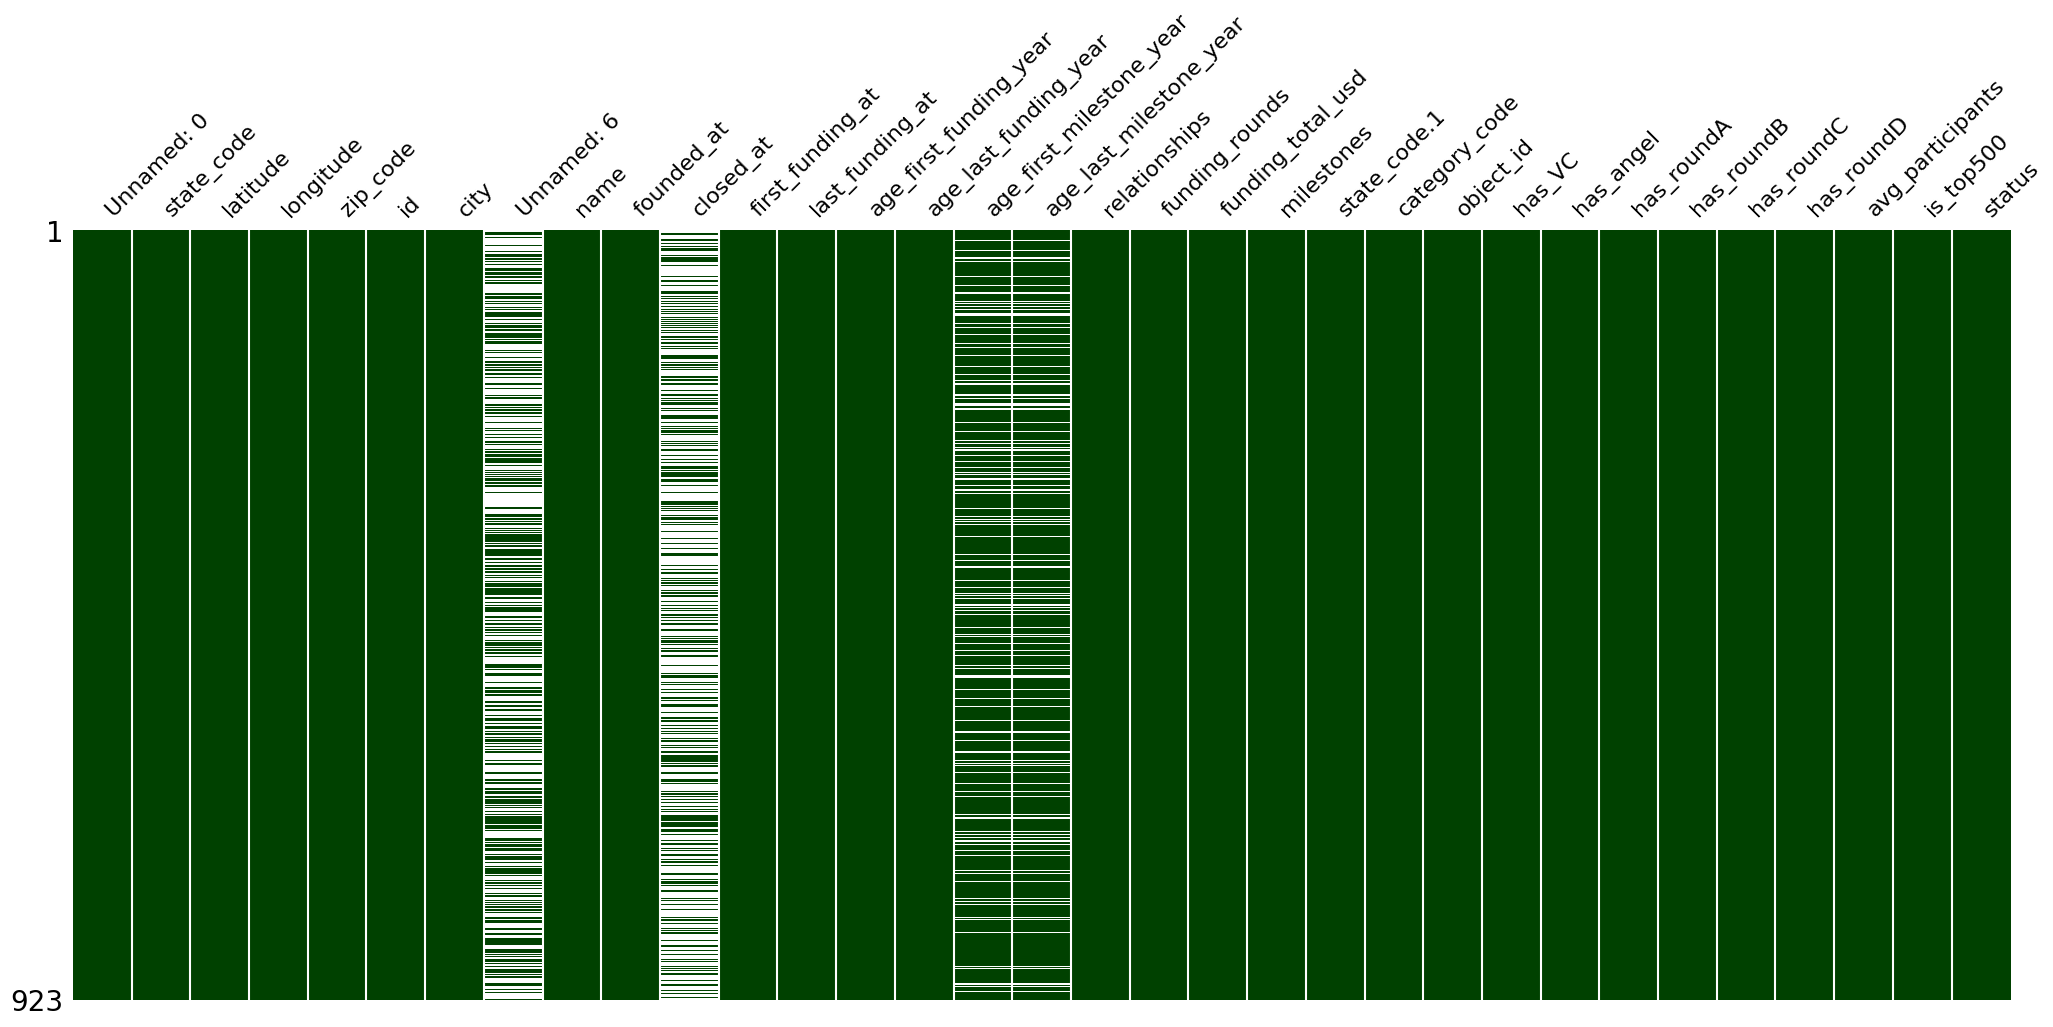

In [ ]:
###Show graphycally the missing value###
msno.matrix(df, color=(0,0.255,0), sparkline=False) #color are in the RGB form

<AxesSubplot: >

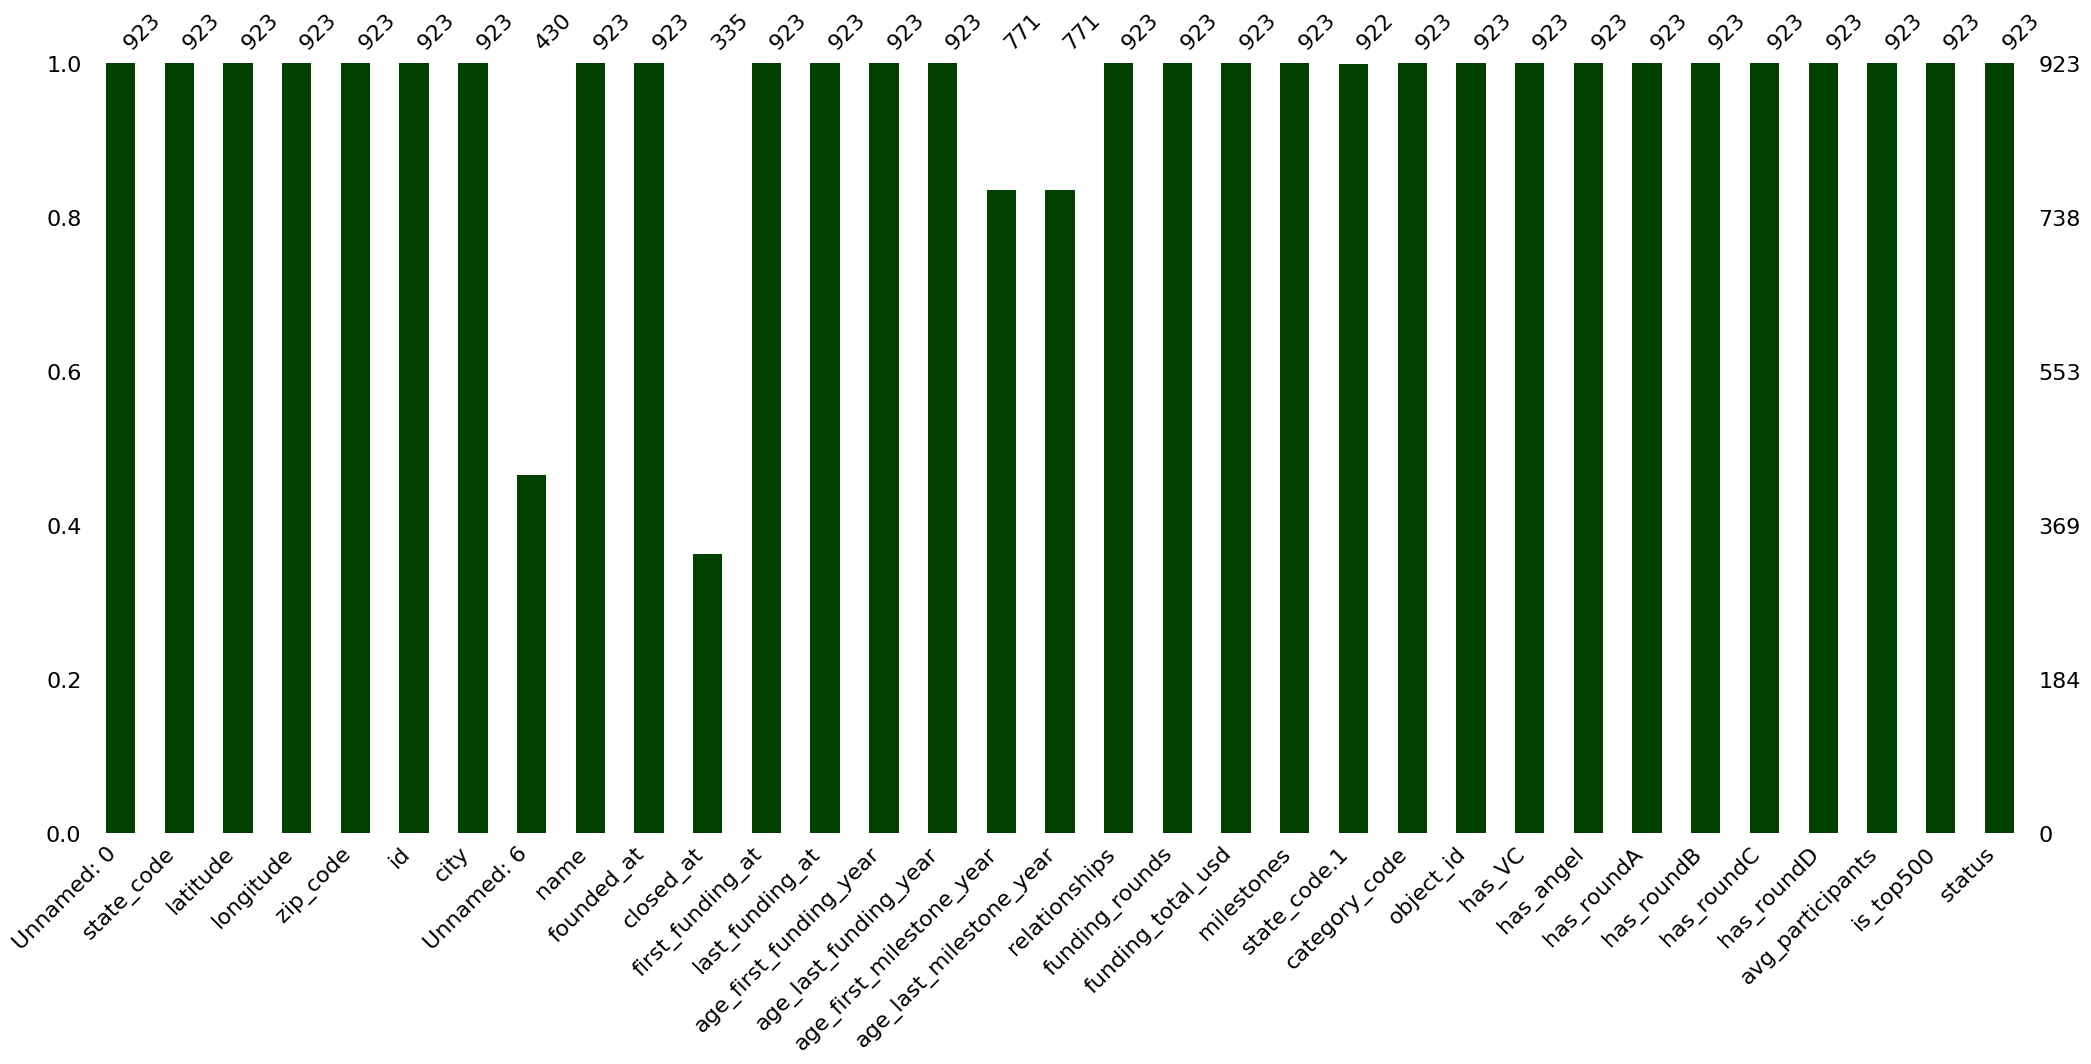

In [ ]:
##percentual of present data for each column##
msno.bar(df, color=(0,0.255,0))

> Looking at what I got, I can say that the main columns that contain null values are: 
1)Unamed:6 , which contains the city, state and postal ID
2)Closed at
3)age first milestone year
4)age last milestone year                                                                                                                                                                                                   

> Possible conclusion about missing datas                                                                                                                                                                                                                  Then observing the value of the definitions I can say that in the preprocessing part I will definitely have to delete the feature: [Closed at] because it corresponds to the label status that is our target and the label [Unmaed:6] since it contains the same information as [zipcode, city, state]. I will also treat the columns of first and last milestone

## The numerical Data

> In a dataset in general two main types of data are typically encountered: numerical data and categorical data. Numerical are data that can be measured on a numerical scale. The categorical data are data that cannot be measured on a numerical scale, but describe qualitative properties of an object or phenomenon. 

> The numerical data, analized in this section can be further divided into two categories: 
-Continuous data: These are data that can take any value within a continuous range. 
-Discrete data: These are data that can only take specific numerical values. 

### Identification of numerical Data

In [ ]:
###Identification of Numerical Data###

numeric=['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_data=[]
df_num=df.select_dtypes(include=numeric)
for x in df_num.head(1):
    print(colored(f"{x}", color='green')+" is a numerical value")
    numerical_data.append(x)
print(f'the numerical value are: '+colored(len(numerical_data), color='blue'))

Unnamed: 0 is a numerical value
latitude is a numerical value
longitude is a numerical value
age_first_funding_year is a numerical value
age_last_funding_year is a numerical value
age_first_milestone_year is a numerical value
age_last_milestone_year is a numerical value
relationships is a numerical value
funding_rounds is a numerical value
funding_total_usd is a numerical value
milestones is a numerical value
has_VC is a numerical value
has_angel is a numerical value
has_roundA is a numerical value
has_roundB is a numerical value
has_roundC is a numerical value
has_roundD is a numerical value
avg_participants is a numerical value
is_top500 is a numerical value
the numerical value are: 19


In [ ]:
##Statistical Summary##
describeNum = df.describe(include =['float64', 'int64', 'float', 'int'])
describeNum.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-198.392260,2881.285370,-87637.000000,-122.204664,-118.383367,-77.214731,18.057121
age_first_funding_year,923.000000,115.332604,699.106419,-1011.000000,0.580800,1.602700,3.917800,7537.000000
age_last_funding_year,923.000000,286.795654,1222.241316,-137.000000,1.852100,3.764400,6.256200,10137.000000
age_first_milestone_year,771.000000,164.395797,1057.087080,-937.000000,1.000000,2.898600,5.090400,16663.000000
age_last_milestone_year,771.000000,367.257963,1539.699197,-7.005500,2.676700,4.819200,7.379450,13011.000000
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000
funding_total_usd,923.000000,25419749.092091,189634364.488794,11000.000000,2725000.000000,10000000.000000,24725000.000000,5700000000.000000


> Now that I have identified what the numerical data are I perform a graphical analysis of  some numerical datas to do this I will mainly use the libraries of matplotlib, math, numpy, seaborn, folium and similar python libraries. 

In this part we will analyzed in a more detailed way: 

- Latitude and longitude which will be used to show the exact position were the startups  borned.  

- Relationships wich will be used to show the number of startups with a particular number of relations.  

- funding_rounds and funding_total_usd   which will be used to show the number of rounds and the total founding 

- has_VC ,has_angel ,has_roundA ,has_roundB ,has_roundC ,has_roundD  which will be used to show how much startups has this characteristics 

### Latitude and Longitude

> To display latitude and longitude on a world map with Python, i will use folium, a libraries used for geograpich data visualisation

In [ ]:
# Inizialization of the map thanks to 
m = folium.Map(zoom_start=2)
# Add points in the map
for lat, lon in zip(df['latitude'], df['longitude']):
    folium.CircleMarker(location=[lat, lon], radius=1, color='green').add_to(m)
# Show the map
m

> It can be seen that most of the data comes from America, this will definitely have to be taken into consideration given the possible differences between different markets. 

### Relationships

> At this point I generate a graph that on the x-axis contains the possible numbers of relationships while on the y-axis the number of startups with that given number of relationships. To do this i will use  Matplotlib and seaborn librarires

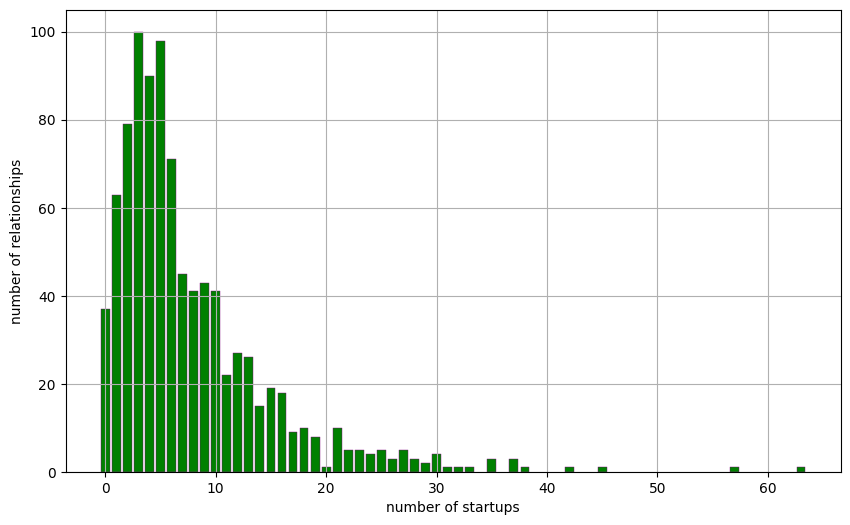

In [ ]:
#create a list with all the number of relation
relationships=[]
for x in df['relationships']:
    relationships.append(x)
relationship_counts={}
for z in relationships: 
    if z in relationship_counts: 
        relationship_counts[z] += 1
    else: 
        relationship_counts[z] = 1


fig, ax=plt.subplots(figsize=(10,6))
ax.bar(relationship_counts.keys(),  relationship_counts.values(), color='green',edgecolor='purple',width=0.8, linewidth=0.3)
ax.set_xlabel('number of startups')
ax.set_ylabel('number of relationships')
plt.grid()


### Funding_rounds and funding_total_usd

> Now still using the matplotlib library I generate two graphs, the first similarly to before will contain the number of startups with each round number and the average founding for each round.  The second one instead will show me the top 15 startups and their total founding received

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
{3: 167, 4: 90, 1: 317, 2: 280, 5: 40, 7: 13, 6: 13, 10: 1, 8: 2}
{'Clearwire': 5700000000, 'Abound Solar': 510000000, 'RetailMeNot, Inc.': 299500000, 'ExactTarget': 238209999, 'Pearl Therapeutics': 232000100, 'SolFocus': 211403000, 'Biolex Therapeutics': 162264126, 'CypherMax': 148000000, 'Yammer': 142000000, 'Luminus Devices': 135826373, 'Virident Systems': 129677153, 'Tumblr': 125250000, 'Pocket Communications Northeast': 125000000, 'Dexterra': 122500000, 'Aragon Pharmaceuticals': 122000000}


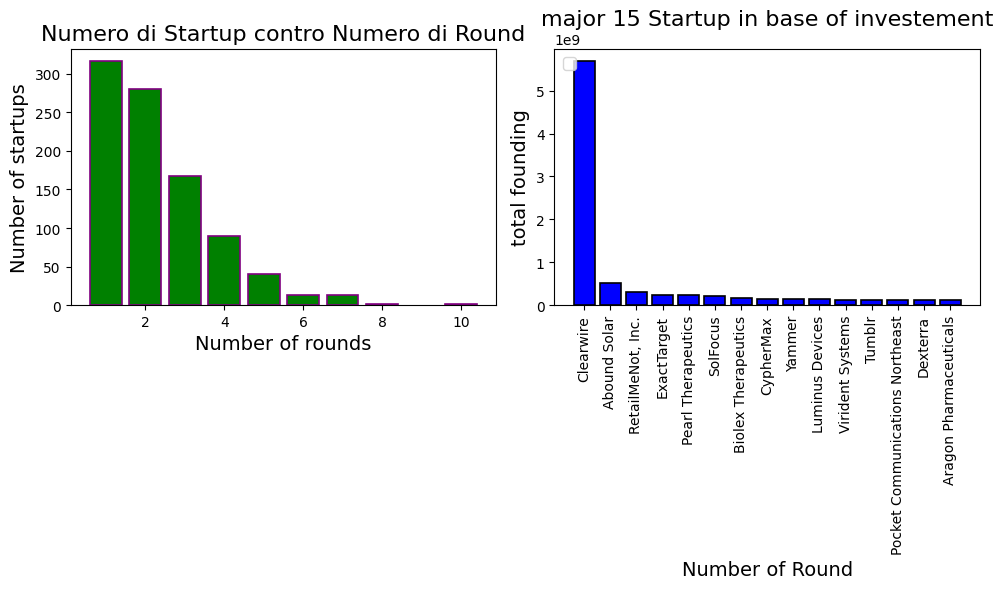

In [ ]:
# Data for the first graph 
rounds=[]
for x in df['funding_rounds']:
    rounds.append(x)
startups_rounds = {}
for y in rounds:
    startups_rounds[y] = startups_rounds.get(y, 0) + 1
print(startups_rounds)

#second graph data
dicti={'startup_name' :df['name'] , 'tot_found':df['funding_total_usd']}
lista = list(zip(dicti['startup_name'], dicti['tot_found']))
ordered_list= sorted(lista, key=lambda x: x[1], reverse=True)[:15]
top15_totalfound = dict(ordered_list)
print(top15_totalfound)

# figure generation
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

#first graph 
axs[0].bar(startups_rounds.keys(), startups_rounds.values(), color='green', edgecolor='purple', linewidth=1.2)
axs[0].set_ylabel('Number of startups', fontsize=14)
axs[0].set_xlabel('Number of rounds', fontsize=14)
axs[0].set_title('Numero di Startup contro Numero di Round', fontsize=16)

#second graph
axs[1].bar(top15_totalfound.keys(), top15_totalfound.values(), color='blue', edgecolor='black', linewidth=1.2)
#axs[1].axhline(np.mean(top15_totalfound.values()), color='red', linestyle='dashed', linewidth=1.5, label='Media Investimenti')
axs[1].set_xlabel('Number of Round', fontsize=14)
axs[1].set_ylabel('total founding', fontsize=14)
axs[1].set_title('major 15 Startup in base of investement', fontsize=16)
axs[1].legend(loc='upper left', fontsize=12)
plt.sca(axs[1])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





> It can be seen from these two graphs that the number of rounds tends to decrease. It can also be deduced that one startup in particular got more funding than any other, who knows if it succeeded and is still open now?

### has_VC ,has_angel ,has_roundA ,has_roundB ,has_roundC ,has_roundD

> Here I will use several pie digarams to show for the binary infimations contained in these columns.

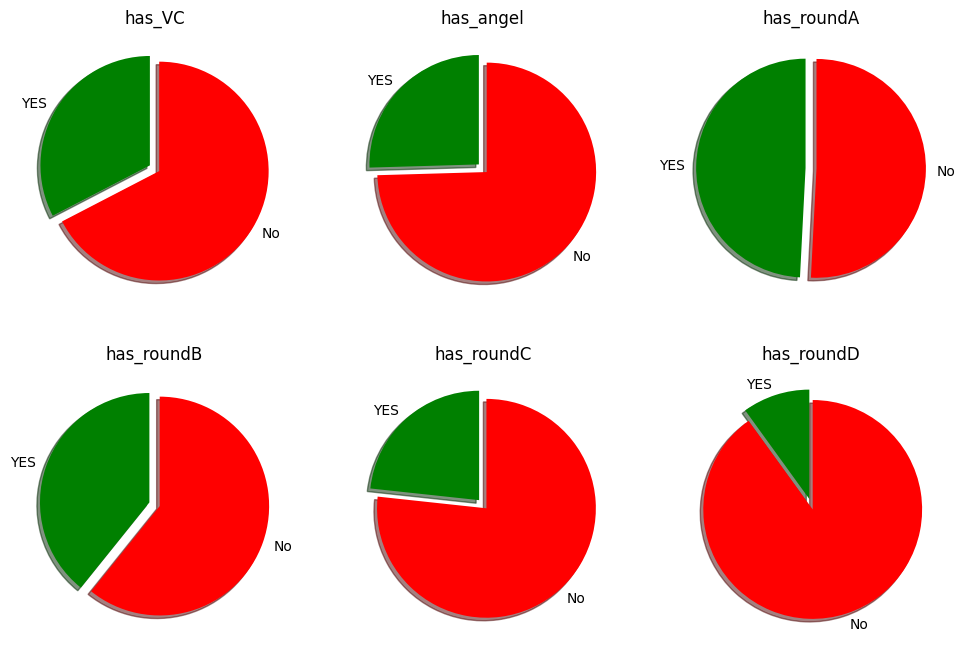

In [ ]:
# Data for the 6 diagram 
data1 = df['has_VC']
data2 = df['has_angel']
data3 = df['has_roundA']
data4 = df['has_roundB']
data5 = df['has_roundC']
data6 = df['has_roundD']


# Crea una figura con 6 subplot
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
explode = (.05, .05)
# Aggiungi i grafici a torta per ogni colonna
axs[0, 0].pie(df['has_VC'].value_counts(), colors=['red', 'green'], startangle=90, counterclock=False, explode=explode, shadow=True, labels=['No','YES'])
axs[0, 0].set_title("has_VC")

axs[0, 1].pie(df['has_angel'].value_counts(), colors=['red', 'green'], startangle=90, counterclock=False, explode=explode, shadow=True, labels=['No','YES'])
axs[0, 1].set_title("has_angel")

axs[0, 2].pie(df['has_roundA'].value_counts(), colors=['red', 'green'], startangle=90, counterclock=False, explode=explode, shadow=True, labels=['No','YES'])
axs[0, 2].set_title("has_roundA")

axs[1, 0].pie(df['has_roundB'].value_counts(), colors=['red', 'green'], startangle=90, counterclock=False, explode=explode, shadow=True,labels=['No','YES'])
axs[1, 0].set_title("has_roundB")

axs[1, 1].pie(df['has_roundC'].value_counts(), colors=['red', 'green'], startangle=90, counterclock=False, explode=explode, shadow=True,labels=['No','YES'] )
axs[1, 1].set_title("has_roundC")

axs[1, 2].pie(df['has_roundD'].value_counts(), colors=['red', 'green'], startangle=90, counterclock=False, explode=explode, shadow=True, labels=['No','YES'])
axs[1, 2].set_title("has_roundD")

# Mostra la figura
plt.show()



> From these graphs it can be seen that going forward with the different rounds the number of startups decreases.

## Categorical Data

>  Categorical data are data that cannot be measured on a numerical scale, but describe qualitative properties of an object or phenomenon. For example, gender, color, or brand of a product. These data can also be divided into two categories:
    -  Nominal data: These are data that can be classified into categories or groups. For example, gender or brand of a product.
    -  Ordinal data: These are data that can be classified in an order. 

> In this section, I differentiate categorical data from numerical data, i explore them. 

### Identification and analysis of Categorical data

In [ ]:
###Identification of  Categorical Data###
categories=['object']
categorical_data=[]
df_cat=df.select_dtypes(include=categories)
for x in df_cat.head(1):
    print(colored(f"{x}", color='green')+" is a categorical value")
    categorical_data.append(x)
print(f'the categorical value are: '+colored(len(categorical_data), color='blue'))

state_code is a categorical value
zip_code is a categorical value
id is a categorical value
city is a categorical value
Unnamed: 6 is a categorical value
name is a categorical value
founded_at is a categorical value
closed_at is a categorical value
first_funding_at is a categorical value
last_funding_at is a categorical value
state_code.1 is a categorical value
category_code is a categorical value
object_id is a categorical value
status is a categorical value
the categorical value are: 14


In [ ]:
##Statistical analyis of categorical data##
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,01-01-03,55
closed_at,335,202,06-01-13,25
first_funding_at,923,585,01-01-08,18
last_funding_at,923,680,01-01-08,11


In [ ]:
##Categorial values counting ##

In [ ]:
cats = ['state_code','zip_code','id','city','Unnamed: 6','name','founded_at','closed_at','first_funding_at','last_funding_at','state_code.1','category_code','object_id','status'] 
for col in cats:
    print(f'''Value count for the column-> {col}:''')
    print(df[col].value_counts())
    print()

Value count for the column-> state_code:
CA    488
NY    106
MA     83
TX     42
WA     42
CO     19
IL     18
PA     17
VA     13
GA     11
OR      7
MD      7
NC      7
NJ      7
OH      6
FL      6
MN      5
CT      4
DC      4
TN      3
MI      3
UT      3
RI      3
IN      2
NH      2
KY      2
AZ      2
MO      2
NV      2
ME      2
NM      1
AR      1
WI      1
WV      1
ID      1
Name: state_code, dtype: int64

Value count for the column-> zip_code:
94107         30
94105         23
95054         20
94103         19
94043         18
              ..
61820          1
94555-3619     1
94010-4031     1
1851           1
98665          1
Name: zip_code, Length: 382, dtype: int64

Value count for the column-> id:
c:28482    2
c:26988    1
c:68157    1
c:11888    1
c:1731     1
          ..
c:49236    1
c:1704     1
c:107      1
c:39101    1
c:24860    1
Name: id, Length: 922, dtype: int64

Value count for the column-> city:
San Francisco    128
New York          91
Mountain View     

> Now that I have identified what the categorical data are I perform a graphical analysis of  some categorical datas to do this I will mainly use the libraries of matplotlib, math, numpy, seaborn, folium and similar python libraries. In this part we will analyzed in a more detailed way: 

In this part we will analyzed in a more detailed way: 

- City and state_code.1: which i will be used to see what city and state are more popular to open a startup.

- founded_at: which i will used to show how the presence of new startups change changing in time.

- Category_code:which i will used to show what are the main categories in the startups words.

- Status: Our label, so i will  analyzed to understand if it need some treatements 

### City and state_code.1

> In this part I looks at the states in which the startups were founded, and specifically for each state I lists the city with the most startups. Do it with mathplot lib

{'CA': 487, 'MA': 83, 'KY': 2, 'NY': 106, 'CO': 19, 'VA': 13, 'TX': 42, 'WA': 42, 'IL': 18, 'NC': 7, 'PA': 17, 'GA': 11, 'NH': 2, 'MO': 2, 'FL': 6, 'NJ': 7, 'WV': 1, 'MI': 3, 'DC': 4, 'CT': 4, 'MD': 7, 'OH': 6, 'TN': 3, 'MN': 5, 'RI': 3, 'OR': 7, 'UT': 3, 'ME': 2, 'NV': 2, 'NM': 1, 'IN': 2, 'AZ': 2, 'ID': 1, 'AR': 1, 'WI': 1}
{'San Diego': 15, 'Los Gatos': 3, 'Cupertino': 8, 'San Francisco': 128, 'Mountain View': 47, 'San Rafael': 2, 'Williamstown': 1, 'Palo Alto': 35, 'Menlo Park': 16, 'Louisville': 2, 'Brooklyn': 5, 'Denver': 3, 'Vienna': 1, 'Los Altos': 2, 'Burlingame': 5, 'New York': 91, 'Austin': 27, 'Seattle': 26, 'Boulder': 6, 'Chicago': 13, 'Berkeley': 3, 'Santa Ana': 1, 'Moffett Field': 1, 'Durham': 3, 'Pittsburgh': 4, 'San Jose': 18, 'Atlanta': 7, 'Manchester': 1, 'Sunnyvale': 22, 'Cambridge': 16, 'San Mateo': 26, 'South San Francisco': 3, 'Boston': 13, 'Waltham': 12, 'Aliso Viejo': 2, 'Kansas City': 1, 'Wilmington': 1, 'Kirkland': 2, 'Tampa': 4, 'Alameda': 2, 'Bothell': 2, '

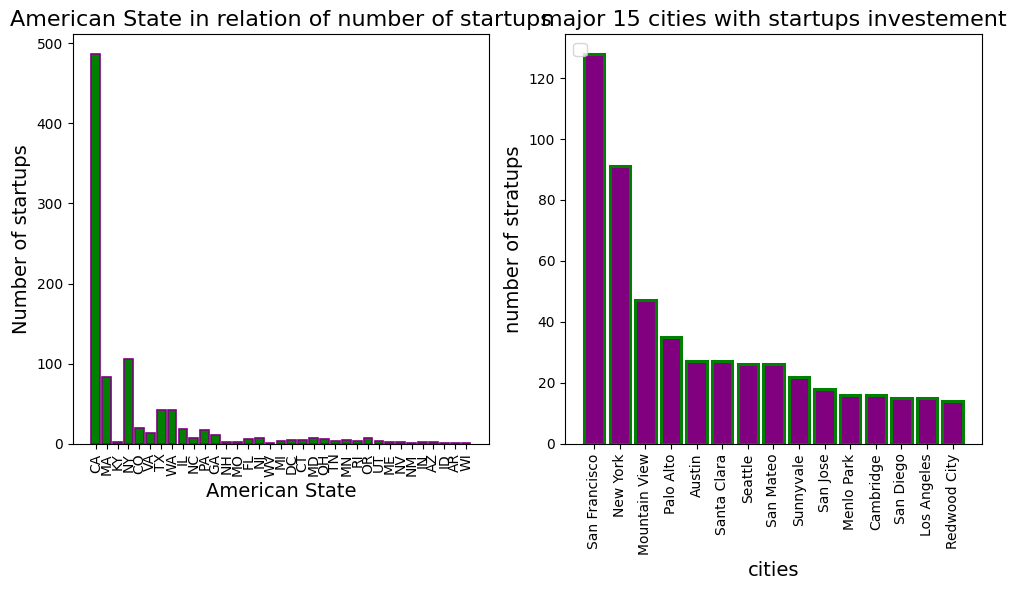

In [ ]:
# Data for the first graph 
states=[]
for x in df['state_code.1']:
    states.append(x)
startups_states = {}
if y is not None:
    for y in states:
        startups_states[y] = startups_states.get(str(y), 0) + 1
startups_states = {k: v for k, v in startups_states.items() if not (type(k) == float and math.isnan(k))}#cancel the nan values
print(startups_states)


# Data for the second graph 
cities=[]
for x in df['city']:
    cities.append(x)
startups_cities = {}
for y in cities:
    if y is not None:
        startups_cities[y] = startups_cities.get(str(y), 0) + 1
startups_cities = {k: v for k, v in startups_cities.items() if not (type(k) == float and math.isnan(k))}#cancel the nan values
print(startups_cities)


# figure generation
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

#first graph 
axs[0].bar(startups_states.keys(), startups_states.values(), color='green', edgecolor='purple', linewidth=1.2)
axs[0].set_ylabel('Number of startups', fontsize=14)
axs[0].set_xlabel('American State', fontsize=14)
axs[0].set_title('American State in relation of number of startups', fontsize=16)
#second graph
n = 15 # il numero di valori che vuoi conservare
startups_cities1= sorted(startups_cities.items(), key=lambda x: x[1], reverse=True)[:n]
startups_cities1 = {k: v for k, v in startups_cities1}
axs[1].bar(startups_cities1.keys(), startups_cities1.values(), color='purple', edgecolor='green', linewidth=2.2)
axs[1].set_xlabel('cities', fontsize=14)
axs[1].set_ylabel('number of stratups', fontsize=14)
axs[1].set_title('major 15 cities with startups investement', fontsize=16)
axs[1].legend(loc='upper left', fontsize=12)
plt.sca(axs[0])
plt.xticks(rotation=90)
plt.sca(axs[1])
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()




> It is observed that the state in which more startups are opened is california, with a greater concentration in the bay area, also known as the silycon valley, a place I know well and am very fond of having lived there. Mountain View>>>. 

### Founded_at

> This column contains a date , I want to use it to show the number of startups for each year contained in my data set.  To do i use the same idea of before.

[2007, 2000, 2009, 2002, 2010, 2002, 2005, 2004, 2002, 2005, 2000, 2006, 2004, 2007, 2001, 1999, 2003, 2000, 2010, 2007, 2001, 2004, 2002, 2008, 2007, 2002, 2003, 2008, 2007, 2005, 2007, 2001, 2006, 2011, 2009, 2004, 2007, 2005, 2008, 2006, 2006, 2011, 2008, 2004, 2002, 2003, 2009, 2009, 2010, 2002, 2006, 2009, 2004, 2000, 2006, 2004, 2006, 2005, 2007, 2000, 1999, 2005, 2001, 2001, 2008, 2006, 1999, 2006, 2000, 2005, 2008, 2012, 2006, 2003, 2007, 2003, 1998, 2010, 2006, 2008, 2010, 2008, 2007, 2002, 2004, 2000, 2006, 2001, 2013, 2003, 2002, 2005, 2007, 2010, 2006, 2002, 2006, 2007, 2008, 2007, 1985, 2000, 2005, 2004, 2007, 2006, 2000, 2011, 2007, 2006, 2007, 2003, 2003, 2006, 2010, 2009, 1997, 2003, 2005, 2010, 2009, 2006, 2009, 2009, 2008, 2006, 2000, 2009, 2003, 2004, 2000, 2010, 2006, 2000, 2010, 2001, 2007, 2004, 2006, 2005, 2007, 2005, 2004, 2006, 2010, 2007, 2009, 2002, 2010, 2002, 2002, 2007, 2010, 2005, 2001, 2010, 2005, 2007, 2008, 2009, 2002, 2009, 2006, 2004, 2008, 2006, 200

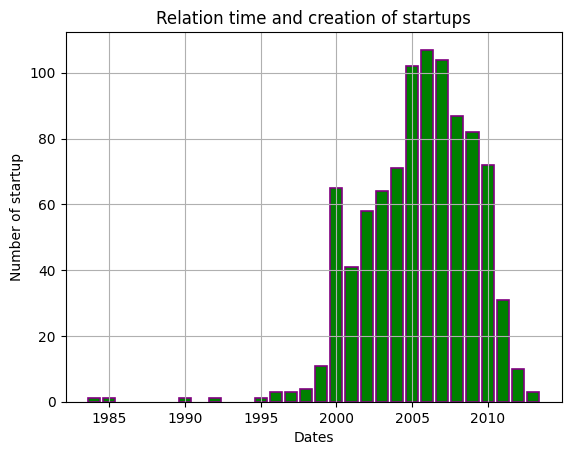

In [ ]:
# Data for the  graph 
dates=[]
for x in df['founded_at']:
    x=x.replace('/','-')
    if int(x[-2:])>=23:
        dates.append(int('19'+x[-2:]))
    else:
        dates.append(int('20'+x[-2:]))

print(dates)

year_counts= {}
for year in dates:
        year_counts[year] = year_counts.get(year, 0) + 1

print(year_counts)

plt.bar(year_counts.keys(), year_counts.values(), color='green', edgecolor='purple', linewidth=1.2)
plt.xlabel("Dates")
plt.ylabel("Number of startup")
plt.title("Relation time and creation of startups")
plt.grid()
plt.show()


It can be seen from the data that the trend is exponentially increasing until 2007 and then begins to decay with time. 

> It is observed how the format of the dates is wrong, I use the following code to replace the values                            ['founded_at', 'first_funding_at','last_funding_at'] and put only the year which can be used later. 

In [ ]:
dates=[]
s=[]
dates1=[]
dates2=[]
for x in df['founded_at']:
    x=x.replace('/','-')
    if int(x[-2:])>=23:
        (int('19'+x[-2:]))
    else:
        dates.append(int('20'+x[-2:]))

for x in df['first_funding_at']:
    x=x.replace('/','-')
    if int(x[-2:])>=23:
        dates1.append(int('19'+x[-2:]))
    else:
        dates1.append(int('20'+x[-2:]))
for x in df['last_funding_at']:
    x=x.replace('/','-')
    if int(x[-2:])>=23:
        dates2.append(int('19'+x[-2:]))
    else:
        dates2.append(int('20'+x[-2:]))

print(len(dates))
print(len(dates1))
print(len(dates2))

df['first_funding_at']=dates1
df['last_funding_at']=dates2

897
923
923


> I will then replace the columns twith the correct lenght , while the ['founded_at'] column e  will be delete because it has missing values with different notations.

### Category_code  and founded at:

> Here I create a graph  that shows the different types of categories. 

['music', 'enterprise', 'web', 'software', 'games_video', 'network_hosting', 'software', 'finance', 'mobile', 'web', 'mobile', 'web', 'web', 'education', 'software', 'public_relations', 'security', 'games_video', 'web', 'enterprise', 'software', 'other', 'web', 'mobile', 'public_relations', 'software', 'public_relations', 'photo_video', 'web', 'hardware', 'other', 'public_relations', 'software', 'mobile', 'security', 'software', 'software', 'hardware', 'ecommerce', 'advertising', 'enterprise', 'mobile', 'travel', 'enterprise', 'advertising', 'software', 'fashion', 'software', 'software', 'software', 'web', 'mobile', 'web', 'public_relations', 'enterprise', 'software', 'analytics', 'consulting', 'software', 'mobile', 'biotech', 'cleantech', 'enterprise', 'software', 'software', 'cleantech', 'software', 'advertising', 'security', 'advertising', 'web', 'software', 'web', 'advertising', 'software', 'software', 'software', 'photo_video', 'games_video', 'mobile', 'mobile', 'cleantech', 'clea

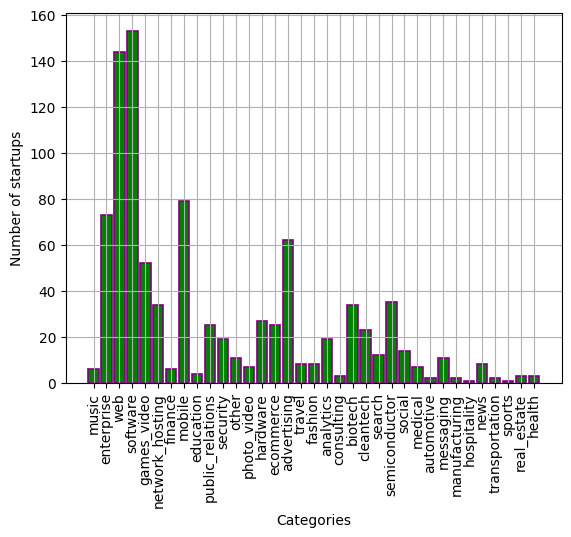

In [ ]:
# Data for the  graph 
categories=[]
for x in df['category_code']:
        categories.append(x)

print(categories)
cat_counts= {}
for y in categories:
        cat_counts[y] = cat_counts.get(y, 0) + 1
        
explode = (.05, .05)
print(cat_counts)
plt.bar(cat_counts.keys(), cat_counts.values(), color='green', edgecolor='purple', linewidth=1.2)
plt.xlabel("Categories")
plt.ylabel("Number of startups")
plt.xticks(rotation=90)
plt.grid()
plt.show()



### A special Categorical Data: The status  label. 

> In this section I will perform a more in-depth analysis of one particular feature, namely status. In fact, status is the target label of this project. A label refers to the target variable or dependent variable that we want to predict. In my case, the label is the status and it is differentiated into two categories: "closed" and "acquired". This in fact it's a Binary supervised classification  problem .                                                                                                                                              Binary supervised classification  is a type of supervised learning, where the goal is to predict one of two possible outcomes, represented as either 0 or 1, True or False, or "closed" and "acquired" in my case. The label, in this case, acts as the ground truth or the correct answer. In order to properly handle the label in a binary classification problem, a number of considerations should be taken into account. First, it is important to ensure that the label is encoded correctly. For example, "closed" could be encoded as 0 and "acquired" as 1. This encoding should be consistent throughout the entire dataset.wer that the machine learning model needs to predict.In order to properly handle the label in a binary classification problem, a number of considerations should be taken into account. 

1. First, it is important to perform exploratory data analysis (EDA) on the label distribution in the dataset to ensure that it is balanced. If the label distribution is heavily skewed towards one category, it can lead to problems such as biased models that perform poorly on the underrepresented class. In such cases, we will talk about imbalanced class and i will take care of in in the preprocessing

undefined. Next, it is important to ensure that the label is encoded correctly. For example, "closed" could be encoded as 0 and "acquired" as 1. This encoding should be consistent throughout the entire dataset.

1. Are my label class unbalanced

> Imbalanced class is a common problem in machine learning, where the distribution of classes in a dataset is not equal. This means that one class significantly outnumbers the other class(es), leading to a class imbalance. This can result in a model that is biased towards the majority class and underperforms on the minority class. 

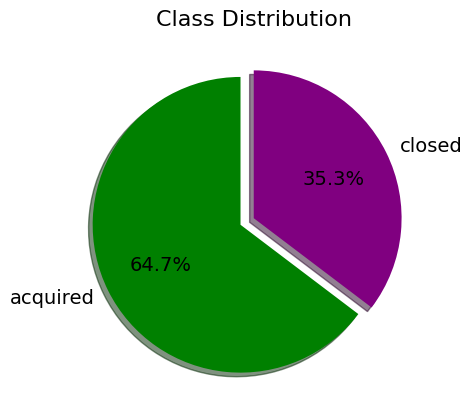

In [ ]:
## Target Balance Visualization ##

# Calcola la distribuzione delle classi
class_distribution = df["status"].value_counts()

# Crea il grafico a torta
fig, ax = plt.subplots()
ax.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, 
       explode=[0.1, 0], shadow=True, textprops={'fontsize': 14}, colors=['green','purple'])

# Aggiungi un titolo al grafico
ax.set_title("Class Distribution", fontsize=16)

# Mostra il grafico
plt.show()



> So in this case i will consider my label  feature unbalanced. Then it can be a challenge for classification algorithms to produce accurate results. This is because the algorithms may be biased towards the class that is more prevalent in the data, and as a result, they may have a harder time accurately predicting the minority class. In your case, with a 65% and 35% distribution, the difference between the classes is significant, meaning that this is an imbalanced classification problem. It's important to address this issue in the project, as it may affect the accuracy of the results.                                                                                                                     Then i will explain later how i could treated the imbalanced class.

2. Encoding class labels

> In this part i will change the value of my label, in particular i will put 0 for the startups that are closed and 1 for the other case. To do this I will add a new column to my dataframe called STATUS.

In [ ]:
# Add the new column
STATUS=[]
for x in df['status']:
    if x=='closed':
        STATUS.append(0)
    else:
        STATUS.append(1)

df["STATUS"] = STATUS
# Vsualize the dataset with the new coumn
df.head(6)


,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,founded_at,...,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,STATUS
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,01-01-07,...,0,1,0,0,0,0,1.0000,0,acquired,1
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,01-01-00,...,1,0,0,1,1,1,4.7500,1,acquired,1
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,3/18/2009,...,0,0,1,0,0,0,4.0000,1,acquired,1
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,01-01-02,...,0,0,0,1,1,1,3.3333,1,acquired,1
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,08-01-10,...,1,1,0,0,0,0,1.0000,1,closed,0
5,379,CA,37.406914,-122.090370,94043,c:22898,Mountain View,Mountain View CA 94043,Matisse Networks,01-01-02,...,0,0,0,1,0,0,3.0000,1,closed,0


# Data Preprocessing 

> In the explonatory data analysis, I showed through an exploratory analysis the data in the table, dividing them into categorical and numerical showing their possible flaws and problems. 

> In this second section, namely the preprocessing of my data I will prepare the dateset to be used by the classification algorithms by correcting the problems they may present by analyzing the techniques to solve them.

The preprocessing phase will be divided into the following sections:

1.  Removing or Imputing missing Values.

undefined. Handling categorical.

undefined. Scaling feature.

undefined. The pipelines and the final transformer.

## Removing and imputing the missing values

> The missing values are the ones that for some lack of knowledge are not conatined in the dataset. In genenal  i could treat in two different ways:

1)Removing columns or row values contained missing data. 
2) Imputing missing values, that means substituting the missing values with the mean of the column (mean imputer), the median (median imputer) and other similar imputation.                                                                                                                                                                                            

> As we have seen in the explanatory data analysis the columns with some missing values are: 

In [ ]:
##Find the percentual of null values in the column##
print(colored(f"\n Percentage of missing value in column with no 0% of null values:", color='green', attrs= ['bold']))
null=pd.DataFrame(df.isnull().sum(),columns=["Null Values"]) 
null["% Missing Values"]=(df.isna().sum()/len(df)*100)
null = null[null["% Missing Values"] > 0]
null.style.background_gradient(cmap='viridis') 


 Percentage of missing value in column with no 0% of null values:


,Null Values,% Missing Values
Unnamed: 6,493,53.412784
closed_at,588,63.705309
age_first_milestone_year,152,16.468039
age_last_milestone_year,152,16.468039
state_code.1,1,0.108342


> So with these observations I decide to treat the following data to the following way:

![Picture title](image-20230214-200003.png)

## Handling categorical Data

> In this section I will discuss the data I identified in the explanatory data analysis as categorical. Specifically, I will differentiate ordinal categorical data that need a certain type of treatment and ordinal categorical data that need another type of change.  

> As we have seen the categorical data are :

In [ ]:
##Statistical analyis of categorical data##
describeNumCat = df.describe(include=["O"])
describeNumCat.T.style.background_gradient(cmap='viridis',low=0.2,high=0.1)

,count,unique,top,freq
state_code,923,35,CA,488
zip_code,923,382,94107,30
id,923,922,c:28482,2
city,923,221,San Francisco,128
Unnamed: 6,430,252,San Francisco CA 94105,12
name,923,922,Redwood Systems,2
founded_at,923,217,01-01-03,55
closed_at,335,202,06-01-13,25
state_code.1,922,35,CA,487
category_code,923,35,software,153


### Nominal Features

> Given that the columns said before will be eliminated, I can observe that I have no ordinal categorical feature, so I will have to treat all the columns in this section of the categorical nominal features. Generally, a method called one hot encoder is used to deal with nominal features.                                                                                                                                                                                             One-hot encoding is a technique used to represent categorical variables as a set of binary features. It works by creating a new binary feature for each category in the original variable and encoding it with a 1 or a 0, indicating whether the observation belongs to that category or not.

> In my case I will not use only the one-hot encoder since many columns have different values and my interest will be only to generate the columns for the n (i used 5 in my project) most present values. I could also create my own transformer called TopNOneHotEncoder. To create it rember that an object is a Transformer if it implements the methods: -fit(X, y) -transform(X) which should return a Pandas Data Frame or a Numpy array. So, we have to define a class that inherits from the BaseEstimator and TransformerMixin classes found in the sklearn.base module, and overides the methods fit and transform.

### My personal Transformer: TopNOneHotEncoder() transformer 

TopNOneHotEncoder

In [ ]:
class TopNOneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self, n=10):
        self.n = n
        self.top_n = []
        
    def fit(self, X, y=None):
        # find n most present values
        for col in X.columns:
            top_n_values = list(X[col].value_counts().nlargest(self.n).index)
            self.top_n.append({col: top_n_values})
        return self
    
    def transform(self, X):
        # Do the one-hot encoding only for the first 5 n columns 
        X_new = pd.DataFrame()
        for i, col in enumerate(X.columns):
            top_n_values = self.top_n[i][col]
            for value in top_n_values:
                new_col = f"{col}_{value}"
                X_new[new_col] = (X[col] == value).astype(int)
        return X_new


### Ordinal feature 

> As mentioned before the text has no ordinal feature, so I will not have to deal with it in the creation of the transformer.  In case there were I could have used the ordinal encoder. 

## Feature scaling 

> Feature scaling is a technique used in machine learning to standardize the range of features or variables in a dataset. It is important because many machine learning algorithms are sensitive to the scale of the input variables, and the variation in scales can negatively impact their performance. The two principal types of scaling are:                                                                                                                                                                                                                                                              1) Min-Max scaling: where features are rescaled to have a range between 0 and 1
2) Standardization: where features are rescaled to have a mean of 0 and standard deviation of 1.

## Pipelines and final column transformer

Dropped Feature

> In this section I will summarize what I said previously by first specifying the columns that will not be used and therefore dropped, namely: 

- Unamed: 0, id,  object_id , name ->Since they are just labels that do not carry real values

- closed_at,  Unnamed: 6 ->Since they have too many null values

- State_code.1 ->Since it's contained the state_code feature the same information

- ZipCode->The same information in other column

- Founded_at->The data format is wrong

Definition of the data transformation pipeline

> Once, we identified the features to discard, we proceed by defining  - not applying - the data transformation pipeline, i.e. specifying which transformation must be applied to each feature. So the final transformation will be like this: 

![Picture title](image-20230219-151954.png)

Define Pipelines

In [ ]:
# Define a function wixh doesn't change the imput value
def identity(x):
    return x

pass_through_transformer = FunctionTransformer(identity)

##Void pipeline##
pipeline_void = Pipeline([
    ('pass_through', pass_through_transformer)
])


In [ ]:
##Pipeline 1#
pipeline_dates= Pipeline([
    ('scaler', StandardScaler()),
    ('imputer',KNNImputer()),
])

Define Final transformation

In [ ]:
final_transformation = ColumnTransformer(
    transformers=[
        ('number', StandardScaler() , ['latitude','longitude','age_first_funding_year','age_last_funding_year','relationships','funding_rounds','funding_total_usd','milestones','avg_participants','first_funding_at','last_funding_at']),
        ('OneHotEncoder',TopNOneHotEncoder(5),['state_code','city','category_code']),
        ('pipeline',pipeline_dates,['age_first_milestone_year','age_last_milestone_year']),
        ('no_changes',pipeline_void,['has_VC','has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'is_top500'])
    ],
remainder='drop', # all columns without transformers will be dropped
verbose_feature_names_out=False, # left the column with original features name
sparse_threshold=0
)



In [ ]:
#Check the final trasformation is ok with a copy of the df##
df_copy = df.copy()
# Apply the transformation
df_copy = final_transformation.fit_transform(df_copy)
df_copy

array([[ 1.02726808,  0.04421793, -0.16184176, ...,  0.        ,
         0.        ,  0.        ],
       [-0.34190037,  0.02653676,  7.17113132, ...,  1.        ,
         1.        ,  1.        ],
       [-1.50192233,  0.02819701, -0.16358264, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.29661454,  0.0265221 , -0.15290179, ...,  0.        ,
         1.        ,  1.        ],
       [-0.25691078,  0.02642749, -0.16397478, ...,  0.        ,
         0.        ,  1.        ],
       [-0.30235947,  0.02653934, -0.16059492, ...,  0.        ,
         0.        ,  1.        ]])

Where we are, a brief recap of what i have did and what i will do next?

> For the moment I have put the basis of the project in place but here the fun begins. In fact in the first sections I performed an exploratory analysis of the data , based on this analysis in fact I generated a transformer that I will use later but as I will explain will be fundamental and unique in the future and more important process that will lead me to the result. 

# Training and test sets

## Generalization 

> Before I continue, it is essential that I introduce the concept of generalization . In fact, a machine learning project can be considered a good and efficient project if it has the ability not only to have a good success rate on the data in which the algorithms train but also to have a good performance on data that has never been seen. This idea is the basis of the generalization and is the thread that will have a fundamental place from now on in my project

What is overfitting?

> Connected to the concept of generalisation, it is essential that I introduce the concept of overfitting. We talk about overfitting when our trained algorithm performs with high accuracy on train data and low accuracy on test data. I will surely talk about overfitting other times as a motivation for my passages, in fact overfitting is defined as the big elephant in the room of machine learning. Within the project many things I will do will be to minimize overfitting and have as general a result as possible, as a first thing  to avoid overfitting is differntiating the data in test and set. 

## Division Between test and set

> When developing a machine learning model, it's important to have a separate set of data to use for testing the model's performance. This separate set is called the "test set," and it's used to evaluate the performance of the model on data that it hasn't seen during training. The remaining data is typically used for training the model and is called the "training set." The reasons why it's important to split data into training and testing sets:                                                                                                                     1)  Preventing Overfitting: By testing the model on data it hasn't seen before, I can assess how well the model is able to generalize to new data. Without a test set, the model may overfit to the training data, meaning it fits the training data very well but performs poorly on new data.                                                                                                                                                                        2)  Evaluating Model Performance: The test set is used toDivision Between test and set evaluate the performance of the model on unseen data. This helps me to determine how well the model will perform in the real world.                                                                                                                 

In [ ]:
X, y = df.drop('STATUS', axis=1), df['STATUS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X                   ,  # dataset without target feature
    y                   ,  # target feature
    test_size    = 0.2  ,  # test set size % with respect to the original set
    stratify     = y    ,  # use y as class labels
    shuffle      = True    # shuffle the data before splitting
)

# Models configurations

## Why and  what is model selection?

Why?

> In this section I have to select the best models that will then be evaluated in the nested-cross validation process which combine hyperparameter optimization and model selection into a single block of code.  I will talk about this process later; right now it is important to focus on what I mean by model. 

What is a model?

>  For model I mean not only a classification model but the more general concept of pipeline which include:                                            

1) data transformation (that'is the transformation defined before called final transformation)
2) dimensionality reduction
3) handling imbalanced classes 
4) classification

> Before moving on to the code part I do a general theoretical explanation of transformers and estimators.

## Dimensionality reduction

> The dimensionality Reduction is an alternative way to reduce the complexity of the model and avoid overfitting.
There are 2 possible ways to reduce the dimensionality:
1. Feature selection: Selection of a subset of the initial feature set. 
2. Feature Extraction: Derive the information from feature set to build a new feature subaspace. 

### Feature selection alghoritmhs 

> It’s a family of greedy search alghorithm to reduce the initial dimension feature space to k dimensional feature subspace with k<d. Greedy means that the solution is not the optimal one but a subotimal solution. The two sequential feature selection alghorithms present in my project are:                                                                                                                                                                                    1)Sequential forward selection,  a feature selection technique in which features are added one at a time to the model, starting with an empty feature set. At each step, the feature that gives the highest improvement in the model's performance is added to the feature set. The process continues until no further improvement is observed. This method can be computationally expensive as it involves iterating over all possible subsets of features.                                                                                                                                                        2)Sequential backwards selection, starts with a full set of features and removes one feature at a time, based on the least important feature in the model. At each step, the feature that causes the least reduction in performance is removed from the model. The process continues until no further improvement is observed.

> I decided to choose  sequential forward selectionand backward  of the mlxtend library 

### Feature Extraction Alghorithm

> This is a family of thechniques wich transform a dataset in a new feature subspace of lower dimesionality.The two main alghorithms are:                                                                                                                                                                                                 1) Principal Component Analysis, is a technique used to reduce the dimensionality of a dataset while retaining as much of the original variation as possible. It works by finding the directions of maximum variance in the data and projecting the data onto those directions. This allows for a smaller number of dimensions to represent the original data, while still capturing most of its information. PCA is an unsupervised technique and does not take into account any class labels or other information about the data, such as the outcome variable. It is commonly used for data exploration, visualization, and compression.                                                      2) Linear Discriminant Analysis (LDA) ,is a technique used for feature extraction and dimensionality reduction, with the goal of maximizing the separation between classes in a dataset. It works by finding the directions in the data that best separate the classes and projecting the data onto those directions. LDA is a supervised technique and requires class labels for each data point.

> I will use both during the project

To sum up in my project i will use the following techniques of dimensionality reduction:

- Doing nothing.

- Sequential forward selection

- Sequential backwards selection:

- Principal Component Analysis (PCA)

- Linear Discriminant Analysis (LDA)

## Handling unbalanced class 

> As shown in the data exploration section, and particularly in my label exploration, it is observed that the values in the class are not very balanced, that is, they are not evenly distributed between 0(closed) and 1 (acquired).

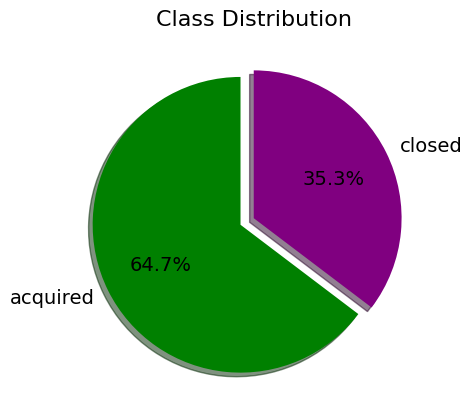

In [ ]:
## Target Balance Visualization ##

# Calcola la distribuzione delle classi
class_distribution = df["status"].value_counts()

# Crea il grafico a torta
fig, ax = plt.subplots()
ax.pie(class_distribution, labels=class_distribution.index, autopct='%1.1f%%', startangle=90, 
       explode=[0.1, 0], shadow=True, textprops={'fontsize': 14}, colors=['green','purple'])

# Aggiungi un titolo al grafico
ax.set_title("Class Distribution", fontsize=16)

# Mostra il grafico
plt.show()


> This problem, called the problem of unbalanced classes, can decrease the accuracy of the result and should therefore be considered in the design. Several solutions are contained in the library imbalanced-learn library. The imbalanced-learn library provides a range of techniques, as well as a Pipeline class that can be used to create a combined sequence of methods to apply to a dataset. The two main techniques wich is possible to used to solve the problem are:                                                                        1)Dealing  imbalanced class by resampling                                                                                                                                                                                                                            2)Dealing imbalanced class by cost-sensitive learning

### Dealing imbalanced class by resampling

> One popular strategy for dealing with class imbalance is resampling. I can group the most important resampling techniques into:
1) upsampling the minority class:This involves increasing the number of instances in the minority class so that it has a larger representation in the dataset. This can be done by duplicating existing instances, creating new synthetic instances, or a combination of both.
2) downsampling the majority class: This involves reducing the number of instances in the majority class so that it has a smaller representation in the dataset. This can be done by randomly removing instances or by selecting a subset of instances using a specific algorithm.
3) generate synthetic training samples: This involves creating new synthetic instances for the minority class, using techniques such as data augmentation or generative models. The goal is to create synthetic instances that are similar to the real instances in the minority class, so that the model can learn to recognize them.

> I will use all of these thee techinques since my data rare unbalanced, i will also try to do no changes as a possibile techiniqìuqe. 

In my project i will use the following techniques to deal with unbalanced class : 

- Doing nothing. 

- RandomOverSampler :  is an upsampling technique used to address class imbalance problems in machine learning. It randomly duplicates samples from the minority class to increase its representation in the dataset, thereby balancing the classes.

- RandomUnderSampler : is a downsampling technique used to address class imbalance problems in machine learning. It randomly removes samples from the majority class to decrease its representation in the dataset, thereby balancing the classes.

- TomekLinks: is an undersampling technique used to address class overlap problems in machine learning. It removes samples from the majority class that are in close proximity to samples from the minority class. This helps to improve the decision boundary between the two classes.

-  SyntheticMinorityOversamplingTechnique (SMOTE) : is a technique used to address class imbalance problems in machine learning. It creates synthetic samples from the minority class by interpolating between existing samples, resulting in an increased representation of the minority class in the dataset.

- NearMiss: is a technique used to address class imbalance problems in machine learning. It reduces the number of majority class samples by keeping only those that are closest to the minority class samples. This helps the model focus on the more informative samples and be less influenced by the numerous majority class samples.

## Binary Classifier and ensemble learning techniques 

> A binary classifier is a type of machine learning model that is trained to classify instances into one of two classes. In a supervised binary classifier, the model is trained on labeled data, where each instance is associated with a known class label. The goal of the model is to learn a decision boundary that separates the two classes, so that it can accurately classify new, unseen instances.

In my project i will use the following classifiers this in accord with no free lunchh theorem of Wolphert no single classifier works better for all possible scenarios , so we need to try different classifier. In this part i will explain the theorethical basis of all the alghorithm eich i will used .: 

### The perceptron

What is the perceptron? 

> The Perceptron is a simple linear model inveted by Rosenblatt in the 1947 that makes binary predictions by taking a weighted sum of the input features and applying a threshold function. It can learn online and is computationally efficient, but may struggle with non-linear decision boundaries. In fact the biggest problem of this alghorithm it's that doesn't converge if the data are not linearly separable. The perceptron is designed to solve binary classification problems, where the goal is to predict whether an input belongs to one of two categories, in fact i use it for a binary classification.

The perceptron Diagram

<center>

![Picture title](image-20230217-140945.png)

> To understand how the perceptron works, it's important to understand some key definitions:  
-  Net Input Function: The net input function calculates the weighted sum of the inputs and bias unit, which is then passed to the activation function. Mathematically is a linear combination of inputs and weights.                                                                        -Activation Threshold Function: The activation function takes the net input value and maps it to a binary output. The most commonly used activation function for perceptrons is the step function, which outputs 1 if the net input is greater than or equal to a certain threshold, and 0 otherwise.                                                                                                                                                              - Bias Unit: The bias unit is a special input unit that is always set to 1. It allows the perceptron to shift the decision boundary, which can be useful for certain types of classification problems.
-Decision Surface: The decision surface is the boundary that separates the two classes in a binary classification problem. In the case of a perceptron, the decision surface is a hyperplane in the input space.

The perceptron learning rule:

> The perceptron learning rule is a method for updating the weights of the input units based on the error between the predicted output and the actual output. The learning rule involves the following two steps:                                                                                                                                                                                                     Step 1: Calculate the error
Step 2: Update the weights , where the learning rate is an hyperparameter that controls the size of the weight updates.

### Logistic regression

What is the Logistic regression?

> Logistic regression is a type of classifier that can be used to solve binary classification problems. It is generally considered to be superior to the perceptron, which only works when the data is linearly separable, because it can still make accurate predictions when the data is not linearly separable.The idea is based on the uses  of a sigmoid function to model the probability of the positive class.

The logistic regression diagram 

<center> 

![Picture title](image-20230217-151334.png)

> To understand how logistic regression works, it's important to understand some key concepts:                                                                                                                   - Net Input Function: The net input function for logistic regression is the same as that of the perceptron. It is a linear combinations function between the labels and their weights.                                                                                                                                                                                                                                                                                                 - The logit function is based on conditional probability and is defined as the natural logarithm of the odds of the positive class. It is a function from [0,1] to the real numbers, and we need to find its inverse in order to get the probability of the positive class. This is done using the logistic sigmoid function, which maps the real numbers to [0,1].                                                                                                                                                                                                                                                      - The logistic sigmoid function serves as the activation function in logistic regression                                                                                                                                        - Threshold Function  a threshold function is used to determine the predicted class based on the output of the logistic sigmoid function. Typically, a threshold of 0.5 is used, so if the output of the logistic sigmoid function is greater than 0.5, the predicted class is the positive class, otherwise it is the negative class.         

Logistic regression learning rule 

> The logistic regression learning rule involves finding the optimal parameters of the model that minimize a cost function. In binary logistic regression, the goal is to learn a model that can accurately classify instances into one of two possible classes, denoted by 0 and 1.                                                                                                                                                                                                           Step 1 : The learning process begins by defining a likelihood function, which is the probability of observing the training data given the current model parameters. The goal is to find the model parameters that maximize this likelihood function.To do this, the cost function is defined as the negative log-likelihood. The cost function is a convex function that is differentiable, making it suitable for optimization using gradient descent.                                                                                                                                                       Step2: The gradient descent algorithm involves iteratively updating the model parameters in the direction of steepest descent of the cost function. This process continues until the cost function reaches a minimum or a predetermined stopping criterion is met.

Sklearn implementation remarks

> One important hyperparameter in logistic regression is the regularization parameter (C), which controls the strength of regularization applied to the model. Regularization helps prevent overfitting by penalizing large weights in the model. The regularization strength is typically set using cross-validation on a held-out validation set.

> The logistic regression learning rule is commonly implemented in machine learning libraries such as scikit-learn in Python, which provides several solver options for optimizing the cost function, including 'liblinear' and 'lbfgs'.

### NN and k-(NN) 

What are NN and k-(NN)?

> Nearest Neighbor (NN) and k-Nearest Neighbor (kNN) algorithms are both popular techniques for classification tasks in machine learning. They belong to the category of instance-based learning algorithms, where the classification is done based on the similarity of the test instance to the training instances. Here's an overview of these algorithms.

NN

> The prediction of NN is based on the nearest most similar point to the test instance. It's a local approximation because the algorithm only considers the training instances that are closest to the test instance, ignoring the rest. The decision boundary of NN is not global because it's influenced by the local distribution of the training instances.

k-NN

> k-Nearest Neighbor (kNN) algorithm is a variation of the NN algorithm. Instead of finding the single nearest neighbor to the test instance, kNN finds the k nearest neighbors and assigns the class label by majority voting. The number k is a hyperparameter that needs to be tuned based on the problem. The mode and plurality voting are used to assign the class label to the test instance in kNN. The mode voting is used when k is odd, and the class label that appears most frequently among the k nearest neighbors is assigned to the test instance. The plurality voting is used when k is even, and the class label with the highest probability is assigned to the test instance.

### Support Vector Machines

What is the support vector machines ?

> Support Vector Machine (SVM) as the maximal margin classifier and the support vector  classifier   is a popular algorithm for classification wich i use in my  machine learning project . SVM works by finding a hyperplane that best separates the data points of different classes in the feature space. The problem of selecting a hyperplane involves finding an optimal separation plane for the data in a dataset. The hyperplane must separate the data so that points belonging to different classes are separated by the widest margin possible.

From maximal margin classifier to support vector machines

> The Maximal Margin Classifier is an algorithm that solves the problem of selecting a hyperplane. However, it has a major limitation: it only works if the data is linearly separable. In other words, if the data cannot be separated by a linear hyperplane, the algorithm cannot find a solution.                                                                                                                                                                   The Support Vector Classifier (SVC) is an improvement over the Maximal Margin Classifier that introduces slack variables controlled by the parameter C. The slack variables allow points to be classified even if they are within the margin or in the error zone. This way, the algorithm can find a solution even for data that is not linearly separable.                                                                                                                                                                                                                                          The Support Vector Machine (SVM) is a further improvement over the SVC based on kernel methods. Kernel methods are a technique that allows non-linear separation to be applied to data by projecting it into a higher-dimensional space. This allows the data to be separated by a non-linear hyperplane in the projection space, which corresponds to a non-linear separation in the original data space.

The kernel methods

> Kernel methods are a powerful technique used in machine learning that allow for non-linear separation of data by projecting it into a higher-dimensional space. The kernel trick is a key aspect of kernel methods that partially solves the problem of computability in machine learning algorithms. This technique allows for the computation of the inner product of the data in the high-dimensional feature space, without actually having to compute the projection of the data into that space. This means that we can effectively use the projection without actually having to perform the computationally intensive task of actually projecting the data into the high-dimensional space.

### Decision tree

> A decision tree is a popular algorithm in machine learning used for both classification and regression tasks. It's called a "tree" because it starts with a single node (the "root") and branches out into multiple "leaves" as it progresses. The goal of the algorithm is to create a model that can accurately predict the target variable based on the values of one or more input variables (also known as "features"). To construct a decision tree, the algorithm uses a greedy search approach. At each step, it selects the feature that will result in the highest "information gain" when used to split the data. Information gain is a measure of the reduction in entropy that would result from the split - in other words, it tells us how much more certain we are about the target variable after the split than we were before. The decision tree continues to split the data based on the feature with the highest information gain until it reaches a "pure" node - that is, a node where all the examples belong to the same class or have the same target value. However, it's important to set a maximum depth for the tree to avoid overfitting the model to the training data.

### Ensemble learning

What is ensemble learning?

> Ensemble learning is a powerful technique that combines the predictions of multiple classifiers to improve the overall accuracy and robustness of the model. The basic idea behind ensemble learning is to leverage the diversity and complementary strengths of different classifiers in order to achieve a better prediction than any single model could achieve on its own.

Voting Classifier

> One of the simplest methods of ensemble learning is majority voting. In binary classification problems, majority voting means that the class label predicted by the ensemble is the one that is predicted by the majority of the individual classifiers. In non-binary problems, plurality voting can be used, which simply means that the class label with the highest number of votes is predicted by the ensemble. 

> In Scikit-learn, majority voting ensembles can be implemented using the ensemble.VotingClassifier class. This class supports both hard and soft voting. Hard voting uses the majority of the predicted class labels to make a final prediction, while soft voting takes into account the predicted probabilities of each classifier and assigns a weight to each prediction. The final prediction is then made by selecting the class label with the highest weighted average probability.

Bagging  : Random Forests.

> Random Forest is a popular ensemble method used in machine learning for both classification and regression tasks. It works by constructing a multitude of decision trees and aggregating their predictions to make a final prediction. Each decision tree in the forest is built using a random subset of the training data and a random subset of the input features, which helps to reduce overfitting and increase the accuracy of the model. 

Boosting : Adaboost

> AdaBoost (Adaptive Boosting) is an ensemble learning method that combines multiple "weak" classifiers to create a "strong" classifier. The weak classifiers are typically simple models, such as decision trees with limited depth or a linear classifier. The algorithm works by iteratively training these weak classifiers on the training data, giving more weight to the misclassified examples in each iteration. At each iteration, the algorithm updates the weights of the training examples based on whether they were classified correctly or incorrectly by the current weak classifier. Examples that are misclassified receive higher weights, so that they are more likely to be correctly classified in the next iteration. The final prediction is a weighted sum of the predictions of all the weak classifiers, with the weights assigned based on their accuracy. 

Boosting : XGBClassifier

> XGBoost (eXtreme Gradient Boosting) is a more recent ensemble boosting technique that builds on the success of gradient boosting. It is particularly effective for large datasets with many features, and it can handle both classification and regression tasks. The algorithm works by building a series of decision trees, with each subsequent tree correcting the errors of the previous trees. The XGBoost algorithm is designed to optimize a specific loss function, such as mean squared error for regression or log loss for classification. It uses a gradient descent approach to minimize the loss function, with each tree fitting the negative gradient of the loss function. The algorithm also includes regularization techniques, such as L1 and L2 regularization, to prevent overfitting.

## Defining the model: Combining transformers and estimator in a pipeline

> As a first step, I define a basic model via a pipeline. To do it we use a specific pipeline name IMBPipeline(). The main purpose of the IMBPipeline is to simplify the process of building a machine learning pipeline that handles class imbalance. It provides a convenient way to combine multiple steps, such as data preprocessing, feature selection, and resampling, into a single object that can be fit and used for prediction. In particular a pipleine must be composed by a sequence of tranformers followed by an estimator. Calling the fit method each transformation first performed fit and then transform before to pass to the next estimator

In [ ]:
model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('sampler', SMOTE()),
    ('dim_reduction', PCA(n_components=0.8)),
    ('classifier', Perceptron())
])

> In machine learning, it is important to ensure that the model is functioning properly and producing accurate predictions. One way to do this is to perform a sanity check, which involves running the fit method and the predict method on the model to verify if any errors occur.

The fit() method

> The fit method is used to train the model on a labeled dataset, where the input features and the corresponding output labels are provided. During training, the model adjusts its parameters to minimize the difference between its predicted output and the true output labels. The fit method can be used to train the model multiple times on different subsets of the dataset, such as in cross-validation.

In [ ]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('number', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'age_first_funding_year',
                                                   'age_last_funding_year',
                                                   'relationships',
                                                   'funding_rounds',
                                                   'funding_total_usd',
                                                   'milestones',
                                                   'avg_participants',
                                                   'first_funding_at',
                                                   'last_funding_at']),
                                                 ('OneHotEncoder',
                                                  TopNOneHotEncoder(n=5),
                                                  ['state_co...
                                                   'age_last_milestone_year']),
                                                 ('no_changes',
                                                  Pipeline(steps=[('pass_through',
                                                                   FunctionTransformer(func=<function identity at 0x7f3e4cd54f70>))]),
                                                  ['has_VC', 'has_angel',
                                                   'has_roundA', 'has_roundB',
                                                   'has_roundC', 'has_roundD',
                                                   'is_top500'])],
                                   verbose_feature_names_out=False)),
                ('sampler', SMOTE()), ('dim_reduction', PCA(n_components=0.8)),
                ('classifier', Perceptron())])

The predict() method

> The predict method is used to make predictions on new, unseen data based on the trained model. It takes the input features as input and returns the predicted output label. The accuracy of the model can be evaluated by comparing the predicted labels to the true labels for a validation or test dataset.

In [ ]:
model_pipeline.predict(X_test)

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1])

Defining the possible techniques for imbalanced class 

> I now text different combinations of classification models, each with a different set of hyperparameters, different dimensionality reduction techniques, each with a different set of hyperparameters, and different methods for handling unbalanced classes.

In [ ]:
sampler_configs = [
    {
        'sampler':[None],# The element is bypassed
    },
    {
        'sampler':[SMOTE(n_jobs=-1)],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    },
    {
        'sampler':[RandomOverSampler()],
        'sampler__sampling_strategy':['minority', 1.2, 0.9, 0.7]
    }, 
     {
        'sampler' : [RandomUnderSampler()]
    }, 
     {
        'sampler'              : [NearMiss()] ,
        'sampler__n_neighbors' : [3, 5, 7]    ,  # number of nearest neighbors to be considered for the minority class samples when creating synthetic samples
        'sampler__version'     : [1, 2]       ,  
    }, 
    {
        'sampler'         : [TomekLinks()],
        'sampler__sampling_strategy':['majority', 1.2, 0.9, 0.7]
        
        
    }]

Defined the possible techniques for dimensionality reduction 

In [ ]:
dim_reduction_configs = [
    {
        'dim_reduction': [None]
    },
    {
        'dim_reduction': [PCA()], #Principal component analysis
        'dim_reduction__n_components': [0.5, 0.7, 0.9] ## parameter that determines the number of principal components to be retained in the transformed feature space
    },
    {
        'dim_reduction': [LDA()] #Linear discriminant analysis
    },
    {
        'dim_reduction': [SFS(estimator=Perceptron(), forward=True, cv = None, scoring = 'f1')], #Sequential forward selection
        'dim_reduction__estimator': [Perceptron(eta0= 0.01,  # the initial learning rate
                                                     class_weight = 'balanced')  ,  # weights for each class in the dataset)), 
                                                     LogisticRegression(C= 0.01,  # the regularization term
                                                     class_weight = 'balanced'  ,  # weights for each class in the dataset
                                                     )],
        'dim_reduction__k_features' : [5,7,10]  
    },
     {
        'dim_reduction': [SFS(estimator=Perceptron(), cv = None, scoring = 'f1')],
        'dim_reduction__estimator': [Perceptron(), LogisticRegression()],
        'dim_reduction__k_features' : [5,7,10]  
    },
    ]

Define the possible algorithm for classifications

In [ ]:
classifier_configs = [
    {
        'classifier': [Perceptron(eta0= 0.01, class_weight = 'balanced')]
                        
    }, 

    {
        'classifier': [LogisticRegression(solver='saga')],
        'classifier__C' : loguniform(0.001,100), 
        'classifier__penalty': ['l1','l2'], 
        'classifier__class_weight' : [None, 'balanced'],
    },

    {
        'classifier': [SVC()],
        'classifier__C': loguniform(0.001, 100), ### eta parameter (learning rate)
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__class_weight': [None, 'balanced'] ##classes weight to use
    },

    {
        'classifier' : [RandomForestClassifier()],
        'classifier__n_estimators': [50, 100, 150, 200, 250, 300], ## number of trees in the forest
        'classifier__max_depth': [4, 6, 8, 10, 12]#maximum depth of each decision tree in the forest
    },

    {
        'classifier'             : [VotingClassifier(estimators=None)] ,
        'classifier__estimators' : [LogisticRegression(C= 0.01,  class_weight = 'balanced' ),
                                    DecisionTreeClassifier(
                                        criterion    = 'entropy'   ,  # f wich quality of a split
                                        max_depth    = 3           ,  # maximum depth of the tree
                                    ) ,
                                    KNeighborsClassifier(
                                        n_neighbors  = 5           ,  # the number of neighbors 
                                    )] ,
        'classifier__voting'     : ['hard', 'soft'] ,  # how predictions from the individual models are combined to form a final prediction
        'classifier__weights'    : [1, 2, 3]        ,  # etermine the influence each individual classifier
    },
    {
        'classifier'             : [VotingClassifier(estimators=None)] ,
        'classifier__estimators' : [LogisticRegression(
                                        C            = 0.01        ,  # the regularization term
                                        class_weight = 'balanced'  ,  # weights for each class in the dataset
                                        solver       = 'liblinear' ,  # the algorithm to use in the optimization problem                          
                                    ) ,
                                    DecisionTreeClassifier(
                                        criterion    = 'entropy'   ,  # function to measure the quality of a split
                                        max_depth    = 3           ,  # maximum depth of the tree
                                    ) ,
                                    KNeighborsClassifier(
                                        n_neighbors  = 5           ,  # the number of neighbors we want the classifier uses
                                    )] ,
        'classifier__voting'     : ['hard', 'soft'] ,  # how predictions from the individual models are combined to form a final prediction
        'classifier__weights'    : [1, 2, 3]        ,  # etermine the influence each individual classifier
    }, 
    {
    'classifier': [AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
                                  criterion='entropy',
                                  max_depth=3))],
    'classifier__n_estimators': [10, 50, 100],
    'classifier__learning_rate': loguniform(0.001, 0.05)
    },
    {
        'classifier'               : [XGBClassifier()] ,
        'classifier__n_estimators' : [100, 500, 1000]                  ,  # number of decision trees that are built in the model
        'classifier__learning_rate': loguniform(0.001, 0.05)           ,  # step size
        'classifier__max_depth'    : [None, 1, 2, 3]                   ,  # controls the maximum depth of a tree
    }
]

Show all the possible configurations

In [ ]:
all_configs = []
for configuration in itertools.product(dim_reduction_configs, classifier_configs, sampler_configs):
    all_configs.append((dict(itertools.chain(*(e.items() for e in configuration)))))
f'Number of all possible configurations: {len(all_configs)}'

'Number of all possible configurations: 240'

In [ ]:
i=0
for x in all_configs:
    i=i+1
    print(f'the {i} configuration is {x}')

the 1 configuration is {'dim_reduction': [None], 'classifier': [Perceptron(class_weight='balanced', eta0=0.01)], 'sampler': [None]}
the 2 configuration is {'dim_reduction': [None], 'classifier': [Perceptron(class_weight='balanced', eta0=0.01)], 'sampler': [SMOTE(n_jobs=-1)], 'sampler__sampling_strategy': ['minority', 1.2, 0.9, 0.7]}
the 3 configuration is {'dim_reduction': [None], 'classifier': [Perceptron(class_weight='balanced', eta0=0.01)], 'sampler': [RandomOverSampler()], 'sampler__sampling_strategy': ['minority', 1.2, 0.9, 0.7]}
the 4 configuration is {'dim_reduction': [None], 'classifier': [Perceptron(class_weight='balanced', eta0=0.01)], 'sampler': [RandomUnderSampler()]}
the 5 configuration is {'dim_reduction': [None], 'classifier': [Perceptron(class_weight='balanced', eta0=0.01)], 'sampler': [NearMiss()], 'sampler__n_neighbors': [3, 5, 7], 'sampler__version': [1, 2]}
the 6 configuration is {'dim_reduction': [None], 'classifier': [Perceptron(class_weight='balanced', eta0=0.01)

# Model selection 

> In a machine learning project, the main goal is to train a model that generalizes well to new data. This requires selecting the best classifier and optimizing its hyperparameters. One powerful technique that combines both of these steps is the nested cross-validation.

## Cross Validation 

> Cross-validation is a machine learning method used to estimate the performance of a model. It involves dividing the data into training and validation sets, training the model on the training set, and evaluating its performance on the validation set. There are different types of cross-validation, including hold-out, k-fold, and stratified k-fold.                                                                                                                                                                                                                                                 Hold out cross validation :  is the simplest form of cross-validation, where the data is randomly split into a training set and a validation set. Although it is easy to implement, it is not recommended because the way in which the data is divided can greatly influence the model's performance.                                                      K-fold cross validation: is ay popular method that divides the data into k subsets (folds) of roughly equal size. The model is trained k times, each time using a different fold for validation and the remaining k-1 folds for training. The performance of the model is then averaged over the k iterations                                    Stratified k-fold: Stratified k-fold is an improvement over k-fold, especially for datasets with unbalanced class proportions. It ensures that the class label proportions are maintained in each fold. 

## Hyperparameters tuning 

> Hyperparameters are parameters that are not learned during the training process, but rather set before the training begins. These hyperparameters need to be optimized to get the best performance from the model. Two popular techniques for hyperparameter tuning are grid search and randomized search.                        Grid search involves selecting a range of values for each hyperparameter and then training the model for all possible combinations of these values.          Randomized search is similar, but instead of trying all possible combinations, it randomly selects a subset of them to train the model.

## Nested Cross Validation

> Nested cross-validation is a technique that combines model selection and hyperparameter tuning to create the most robust model. It involves two loops - an outer loop and an inner loop. The outer loop is used to evaluate the performance of the model, and the inner loop is used for hyperparameter tuning.

<center>

![Picture title](image-20230216-133834.png)

## Inner Loop: Hyperparameter Tuning with Randomized Search

> The inner loop of nested cross validation uses a hyperparameter tuning technique to identify the best hyperparameters for a given model. The technique used in the provided code is called "Randomized Search".                                                                                                                                                                                             In Randomized Search, the model is trained and evaluated multiple times with different sets of hyperparameters, which are sampled randomly from a distribution. This is in contrast to a grid search approach where all possible combinations of hyperparameters are evaluated. Randomized Search is computationally more efficient and can often identify good hyperparameters within a reasonable amount of time.

In [ ]:
rs = RandomizedSearchCV(
    estimator= model_pipeline,
    param_distributions=all_configs,
    n_iter=len(all_configs) * 5,
    n_jobs=-1,
    cv = 2,
    scoring='f1'
)

## The outer loop : k-fold cross validation

> The outer loop of nested cross validation is used to evaluate the performance of the model on unseen data. The evaluation is performed using cross validation, which involves splitting the data into training and testing sets multiple times. The cross_validate function is part of the scikit-learn library and by default, it performs k-fold cross validation where k is specified by the cv parameter. 

> In addition to k-fold cross validation, scikit-learn also provides other types of cross validation methods, such as stratified k-fold cross validation, leave-one-out cross validation, and shuffle-split cross validation. These can be specified using different functions and parameters within scikit-learn.

In [ ]:
scores = cross_validate(rs, X_train, y_train, scoring='f1', cv = 5, return_estimator=True, verbose=3, error_score='raise' ) #115minutes

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] END ......................................., score=0.859 total time=22.4min
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 22.4min remaining:    0.0s
[CV] END ......................................., score=0.841 total time=21.0min
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 43.4min remaining:    0.0s
[CV] END ......................................., score=0.865 total time=23.1min
[CV] END ......................................., score=0.833 total time=22.7min
[CV] END ......................................., score=0.841 total time=26.6min
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 115.8min finished


## The best 5 model  based on f1 performance 

In [ ]:
print(colored('Best 5 Estimators: Sampler, dimensionality reducction and performance (F1-score)',color='green'))
for index, estimator in enumerate(scores['estimator']):
    pred_train = estimator.best_estimator_.fit(X_train, y_train)
    pred_train = estimator.best_estimator_.predict(X_train)
    pred_test = estimator.best_estimator_.predict(X_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    print(f'F1 on training set:{f1_train}, F1 on test set:{f1_test}')
    print('Sampler: ', estimator.best_estimator_.get_params()['sampler'] )
    print('DIm_red: ',estimator.best_estimator_.get_params()['dim_reduction'])
    print('Classifier: ',estimator.best_estimator_.get_params()['classifier'],estimator.best_estimator_.get_params()['classifier'].get_params())
    print(scores['test_score'][index])
    print(colored(f'-'*100, color='green'))

Best 5 Estimators: Sampler, dimensionality reducction and performance (F1-score)
F1 on training set:0.9047160731472569, F1 on test set:0.8275862068965516
Sampler:  None
DIm_red:  None
Classifier:  RandomForestClassifier(max_depth=6, n_estimators=200) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
0.8585365853658536
----------------------------------------------------------------------------------------------------
F1 on training set:0.9333333333333333, F1 on test set:0.8384615384615385
Sampler:  None
DIm_red:  None
Classifier:  RandomForestClassifier(max_depth=8, n_estimators=200) {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterio

## The best Model

# A second hyperparameter Tuning on the best model

> Thanks to nested cross validation I got the best possible pipeline we find that the best model contain only the classifier the random forest without the resampling and dimensionality reduction techniques. Starting from here then to get an even more accurate and less problem-prone result I use an optimization of hyperparameters on this model. To do i will use a randomize search

In [ ]:
best_model_pipeline = IMBPipeline([
    ('trans', final_transformation),
    ('classifier',RandomForestClassifier(max_depth=10, n_estimators=300))
   
])

In [ ]:
parameters = {
    'classifier__max_depth': [4, 8, 12, 16, 20],
    'classifier__n_estimators': [50, 100, 150, 200]
}

In [ ]:
rs_best = RandomizedSearchCV(
estimator = best_model_pipeline,
param_distributions = parameters,
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3),
n_iter=20,
scoring='f1'
)

In [ ]:
rs_best.fit(X_train, y_train)

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=None),
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(sparse_threshold=0,
                                                                transformers=[('number',
                                                                               StandardScaler(),
                                                                               ['latitude',
                                                                                'longitude',
                                                                                'age_first_funding_year',
                                                                                'age_last_funding_year',
                                                                                'relationships',
                                                                                'funding_rounds',
                                                                                'funding_total_usd',
                                                                                'milestones',
                                                                                'avg_parti...
                                                                                                FunctionTransformer(func=<function identity at 0x7f3e4cd54f70>))]),
                                                                               ['has_VC',
                                                                                'has_angel',
                                                                                'has_roundA',
                                                                                'has_roundB',
                                                                                'has_roundC',
                                                                                'has_roundD',
                                                                                'is_top500'])],
                                                                verbose_feature_names_out=False)),
                                             ('classifier',
                                              RandomForestClassifier(max_depth=10,
                                                                     n_estimators=300))]),
                   n_iter=20,
                   param_distributions={'classifier__max_depth': [4, 8, 12, 16,
                                                                  20],
                                        'classifier__n_estimators': [50, 100,
                                                                     150,
                                                                     200]},
                   scoring='f1')

In [ ]:
rs_best.best_estimator_

Pipeline(steps=[('trans',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('number', StandardScaler(),
                                                  ['latitude', 'longitude',
                                                   'age_first_funding_year',
                                                   'age_last_funding_year',
                                                   'relationships',
                                                   'funding_rounds',
                                                   'funding_total_usd',
                                                   'milestones',
                                                   'avg_participants',
                                                   'first_funding_at',
                                                   'last_funding_at']),
                                                 ('OneHotEncoder',
                                                  TopNOneHotEncoder(n=5),
                                                  ['state_co...
                                                  ['age_first_milestone_year',
                                                   'age_last_milestone_year']),
                                                 ('no_changes',
                                                  Pipeline(steps=[('pass_through',
                                                                   FunctionTransformer(func=<function identity at 0x7f3e4cd54f70>))]),
                                                  ['has_VC', 'has_angel',
                                                   'has_roundA', 'has_roundB',
                                                   'has_roundC', 'has_roundD',
                                                   'is_top500'])],
                                   verbose_feature_names_out=False)),
                ('classifier',
                 RandomForestClassifier(max_depth=8, n_estimators=150))])

In [ ]:
f1_score(y_test, rs_best.best_estimator_.predict(X_test))

0.8339768339768341

# Model Evaluation

## Evalueation with performance matrices 

> Performance matrices are an essential tool for evaluating the classification abilities of machine learning algorithms. Here i will use a toll called confusion matrix , i will explicate in deeper what is it 

### Confusion Matrix

> The confusion matrix is a matrix used to evaluate binary or multiclass classification. In the binary case, it contains four cells, as shown below:

Confusion Matrix: 
[[34 31]
 [12 108]]


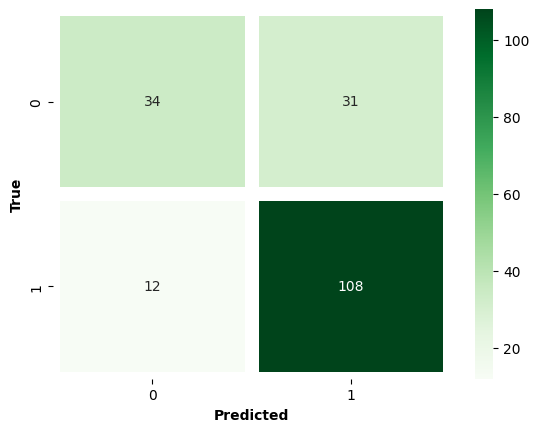

In [ ]:
# Use the best estimator found with the second hyperparameter tuning
cls = rs_best.best_estimator_

# Predict labels on the test set
y_pred = cls.predict(X_test)

# Generate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Print the confusion matrix
print(f"Confusion Matrix: \n[[{tn} {fp}]\n [{fn} {tp}]]")

# Plot the confusion matrix using seaborn
sns.heatmap([[tn, fp], [fn, tp]], linewidths=10, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('True', fontweight='bold')
plt.show()


### The performance measures for the confusion matrix 

> This matrix is essential because it allows for the measurement of several performance metrics, including:                                   -Recall: The proportion of actual positive instances that are correctly identified as positive 
-False Positive Rate (FPR): The proportion of actual negative instances that are incorrectly identified as positive . This is particularly useful for imbalanced class problems, such as cancer detection, where the negative instances vastly outnumber the positive instances.    
-Precision: The proportion of predicted positive instances that are actually positive 
-F1 Score: A metric that balances precision and recall 
-Matthews Correlation Coefficient (MCC): A metric that takes into account all four cells in the confusion matrix 

In [ ]:
performances = {
    'recall' : recall_score, #Recall score 
    'precision' : precision_score, #Preciion score
    'f1' : f1_score, #f1 score
    'MCC' : matthews_corrcoef,  #MCC score
}

data_sets = {'train' : (X_train, y_train),'test' : (X_test, y_test)}

evaluation = {k:[]for k in performances.keys()}
evaluation['data_set'] = []

In [ ]:
##Create a dataframw which contain all the possible evaluation of my final model

# Initialize classifier with best parameters
cls = rs_best.best_estimator_

# Train classifier on the training set
X_train, y_train = data_sets['train']
cls.fit(X_train, y_train)

# Evaluate classifier on each dataset
evaluation = {'data_set': [], 'recall': [], 'precision': [], 'f1': [], 'MCC': []}
for d_name, d_set in data_sets.items():
    evaluation['data_set'].append(d_name)
    X, y = d_set
    y_pred = cls.predict(X)
    y_pred_prob = cls.predict_proba(X)[:, 1]
    for perf_name, perf in performances.items():
        if perf_name == 'AuC':
            evaluation[perf_name].append(perf(y, y_pred_prob))
        else:
            evaluation[perf_name].append(perf(y, y_pred))
        
# Create a pandas DataFrame to store the evaluation results
df_evaluation = pd.DataFrame(evaluation)
df_evaluation

,data_set,recall,precision,f1,MCC
0,train,1.0,0.880074,0.936212,0.812957
1,test,0.9,0.776978,0.833977,0.467283


### ROC curve

> An important curve to plot is the Receiver Operating Characteristic (ROC) curve. The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at various thresholds. A good ROC curve should be located close to the top-left corner of the plot, which indicates a high true positive rate and a low false positive rate. Conversely, a bad ROC curve will be located close to the diagonal line, indicating that the model's predictions are no better than random guessing.

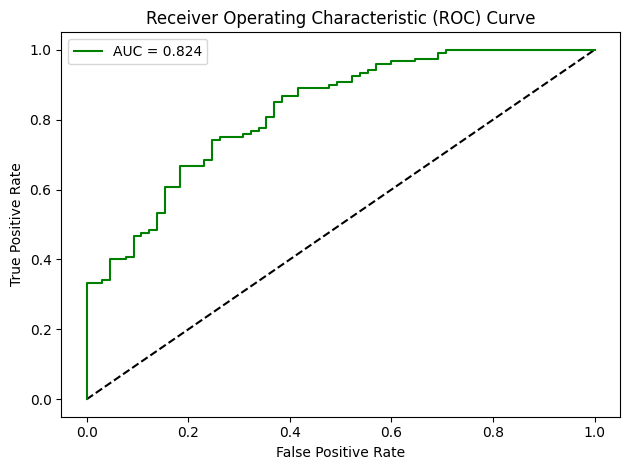

In [ ]:
# Use the best estimator found with the second hyperparameter tuning
cls = rs_best.best_estimator_

# Predict probabilities on the test set
y_pred_prob = cls.predict_proba(X_test)[:, 1]

# Calculate AUC score
auc = roc_auc_score(y_test, y_pred_prob)

# Calculate coordinates of ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# ROC Curve Visualization
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, color='green', label='AUC = {:.3f}'.format(auc))

# Add labels and title to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')

# Show legend
plt.legend(loc='best')

# Show the plot
plt.tight_layout()
plt.show()


> As i could see my ROC curve is quite good.

### Precision Recall curved

Text(0, 0.5, 'Precision')

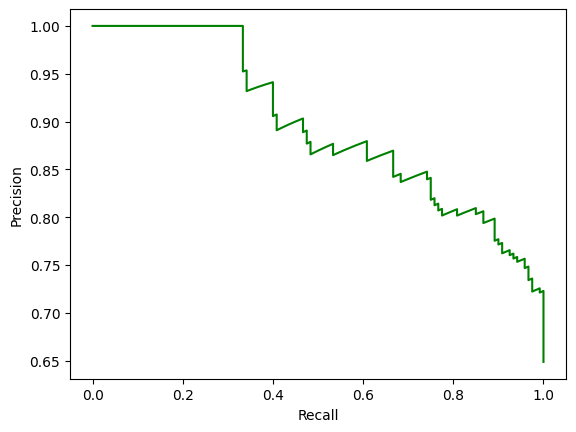

In [ ]:
y_pred_prob = cls.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

precision_recall_curve_plot = plt.figure().add_subplot()
precision_recall_curve_plot.plot(recalls, precisions, color='green')
precision_recall_curve_plot.set_xlabel("Recall")     # x axe label
precision_recall_curve_plot.set_ylabel("Precision")  # y axe label

> Another important curve is the Precision-Recall curve, which plots the trade-off between precision and recall at various thresholds. A good Precision-Recall curve should be located close to the top-right corner of the plot, indicating high precision and high recall. This is particularly useful for imbalanced datasets, where precision and recall can be more important than accuracy. And also here my precision recall curve is quite good

## Evaluation by validation and learning curves

### Learning curves

> Learning curves are a tool used to diagnose whether a machine learning model is overfitting or underfitting. These curves are plotted with the training set size on the x-axis and the model's performance on the y-axis.

![Picture title](image-20230218-103424.png)

> If the learning curve shows that the performance on the training set is poor even with a large training set, then the model is underfitting. This is because the model is not complex enough to capture the patterns in the data. If the learning curve shows that the performance on the training set is good, but the performance on the validation set is poor, then the model is overfitting. This is because the model is too complex and is fitting to the noise in the data. Ideally, the learning curve should show that the performance on the training set is good, and the performance on the validation set is also good. This means that the model is generalizing well to new data.

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(cls,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes= [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                                                       cv = 5,
                                                       n_jobs = -1,
                                                       scoring = 'f1',
                                                       shuffle = False)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



(0.6, 1.03)

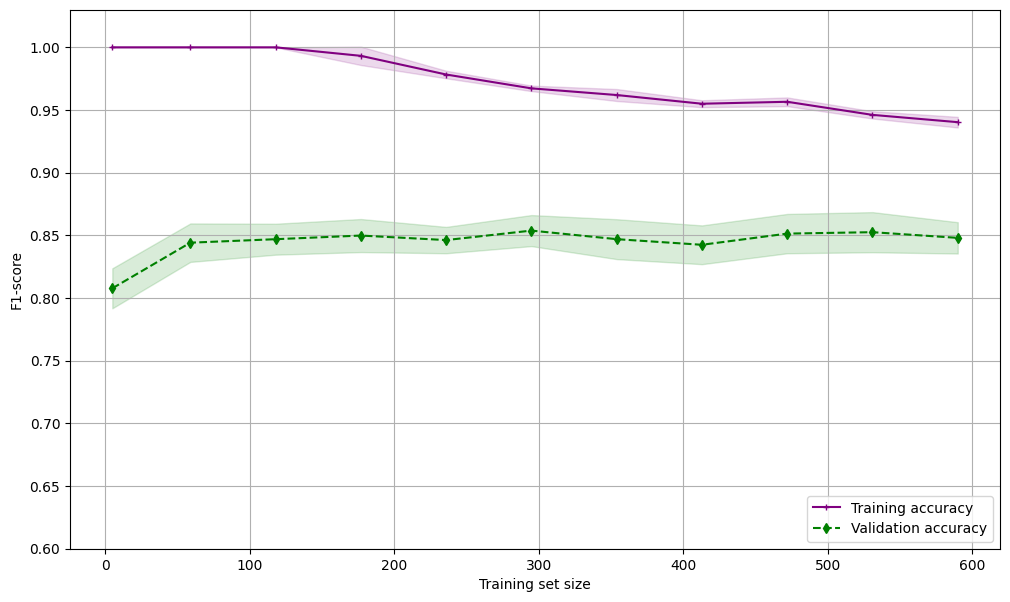

In [ ]:
fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()

ax.plot(train_sizes, train_mean,
         color='purple', marker='+',
         markersize=5, label='Training accuracy')

ax.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='purple')

ax.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='d', markersize=5,
         label='Validation accuracy')

ax.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Training set size')
ax.set_ylabel('F1-score')
ax.legend(loc='lower right')
ax.set_ylim([0.60, 1.03])

### Validation curve

In [ ]:
max_depth = [8, 10, 12, 14, 16]
train_scores, test_scores = validation_curve(
    cls, X=X_train, y=y_train, 
    param_range=max_depth, param_name='classifier__max_depth',
    cv=10, n_jobs=-1, scoring='f1'
)

> A validation curve is used to diagnose the overfitting and underfitting of a model by varying a hyperparameter and plotting the model's performance on the training and validation sets. The axes of the validation curve depend on the hyperparameter that is being varied. I have a pipeline with a Random Forest Classifier and an undersampling technique, then the x-axis of the validation curve will show the values of the hyperparameter that is being varied (e.g., the depth of the Random Forest), and the y-axis will show the performance of the model (e.g., accuracy).

> If the validation curve shows that the performance on both the training and validation sets is poor for all values of the hyperparameter, then the model is underfitting. This means that the hyperparameter is not allowing the model to capture the patterns in the data. If the validation curve shows that the performance on the training set is good, but the performance on the validation set is poor for high values of the hyperparameter, then the model is overfitting. This means that the hyperparameter is allowing the model to fit to the noise in the data. Ideally, the validation curve should show that the performance on the training and validation sets is good for some value of the hyperparameter. This means that the model is generalizing well to new data and the hyperparameter is allowing the model to capture the relevant patterns in the data.

(8.0, 16.0)

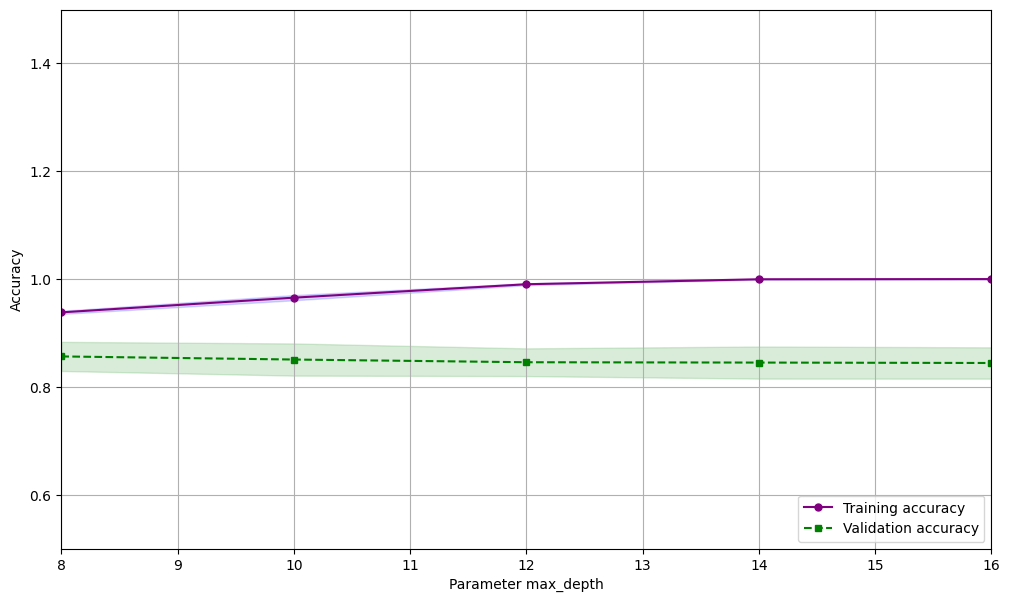

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

fig=plt.figure(figsize=(12,7))
ax = fig.add_subplot()
ax.plot(max_depth, train_mean,
         color='purple', marker='o',
         markersize=5, label='Training accuracy')

ax.fill_between(max_depth,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

ax.plot(max_depth, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

ax.fill_between(max_depth,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

ax.grid()
ax.set_xlabel('Parameter max_depth')
ax.set_ylabel('Accuracy')
ax.legend(loc='lower right')
ax.set_ylim([0.5, 1.5])
ax.set_xlim([8., 16])

# Conclusion

To conlude, I can say that the choices I made to achieve as precise and general a result as possible worked. In fact, as evidenced by the different graphs and values seen in the model evaluation there is little overfitting and the accuracy you have on the test predictions is good. Despite this surely improvements can be implemented that would grant this work an even better result. In fact as a first thing it would certainly be good to have a greater amount of data and especially a greater difference between the data, which in my case are representative only for startups at the American and European level. It would also certainly have been interesting to know the VCs that funded each of the startups so that we could raise the accuracy and also understand where it would be correct to look for work to be sure not to lose it. 

# 

### 

### 

## 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e40ffd4-5637-4154-b429-84843a2488bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>